# РТ5-61Б, Забурунов Л. В.

# Технологии Машинного Обучения

# Лабораторная Работа №4

## "Линейные модели машинного обучения. Машины опорных векторов. Деревья решений."

Проведём в рамках лабработы два исследования: для классификации и для регрессии.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Часть 1. Классификация

### 1. Исследование структуры набора данных

In [2]:
lab4_classification_data = pd.read_csv("ML_Datasets/Lab4/pulsar_data_train.csv")

In [3]:
lab4_classification_data.shape

(12528, 9)

In [4]:
lab4_classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


В связи с излишней для нас "астрономичностью" названий давать дополнительные пояснения смысла не имеет.

In [5]:
lab4_classification_data.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [6]:
lab4_classification_data["target_class"].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

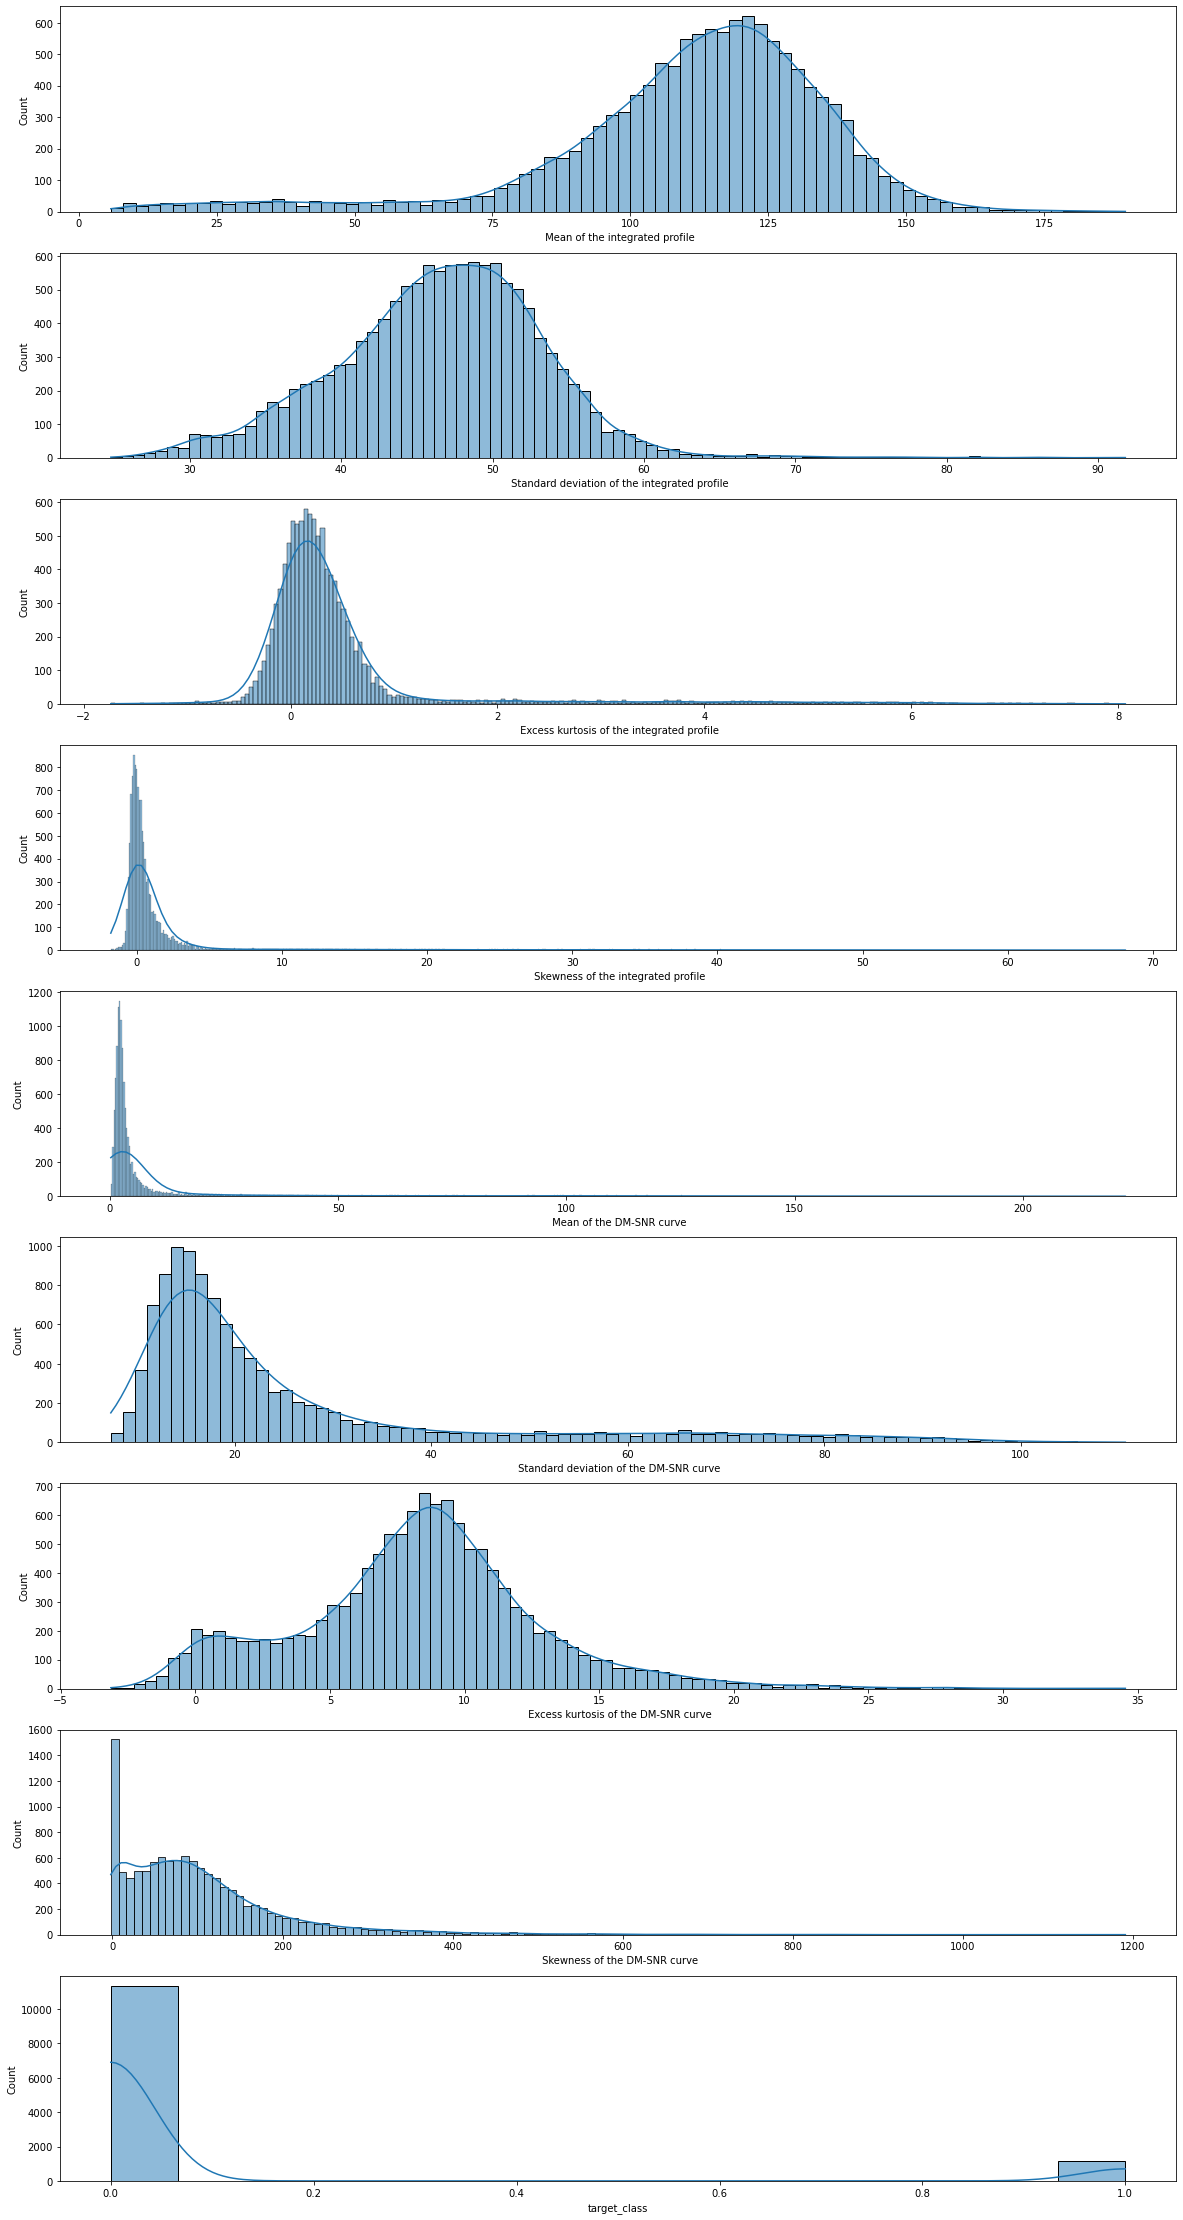

In [5]:
import matplotlib.pyplot as plt

def ShowColumnsDistribution(data):
    columnsToScale = data.columns.to_list()
    fig, ax = plt.subplots(len(columnsToScale), 1, figsize=(20,40))
    for i in range(len(columnsToScale)):
        sns.histplot(data[columnsToScale[i]], ax=ax[i], kde = True)
        
ShowColumnsDistribution(lab4_classification_data)


Прежде всего необходимо заполнить пропуски в данных. Все признаки за исключением целевого распределены непрерывно, поэтому применим заполнение на основе среднего выборочного.

После заполнения мы отмасштабируем признаки, поскольку они сильно разнятся по характеристикам распределения. Поскольку все признаки (помимо целевого) имеют длинные хвосты, применим к каждой колонке z-оценку.

In [14]:
from sklearn.preprocessing import StandardScaler


zScaler = StandardScaler()
columns = lab4_classification_data.columns.to_list()

In [15]:
from sklearn.impute import SimpleImputer, MissingIndicator


# Подпрограмма для заполнения пропусков
def ColumnImputer(data, columnName, strategyName):   
    data_column = data[[columnName]]
    mask = MissingIndicator().fit_transform(data_column)
    imputer = SimpleImputer(strategy = strategyName)
    column_imputed = imputer.fit_transform(data_column)
    return column_imputed


zScaler = StandardScaler()


# Заполняем пропуски и масштабируем признаки
columns = lab4_classification_data.columns.to_list()


for column in columns[:-1]:
    lab4_classification_data[column] = ColumnImputer(lab4_classification_data, column, "mean")
    
lab4_classification_data.to_csv("ML_Datasets/Prepared/pulsar_filled.csv")
    
for column in columns[:-1]:
    lab4_classification_data[column] = zScaler.fit_transform(lab4_classification_data[[column]])
    
lab4_classification_data.to_csv("ML_Datasets/Prepared/pulsar_filled_n_scaled.csv")

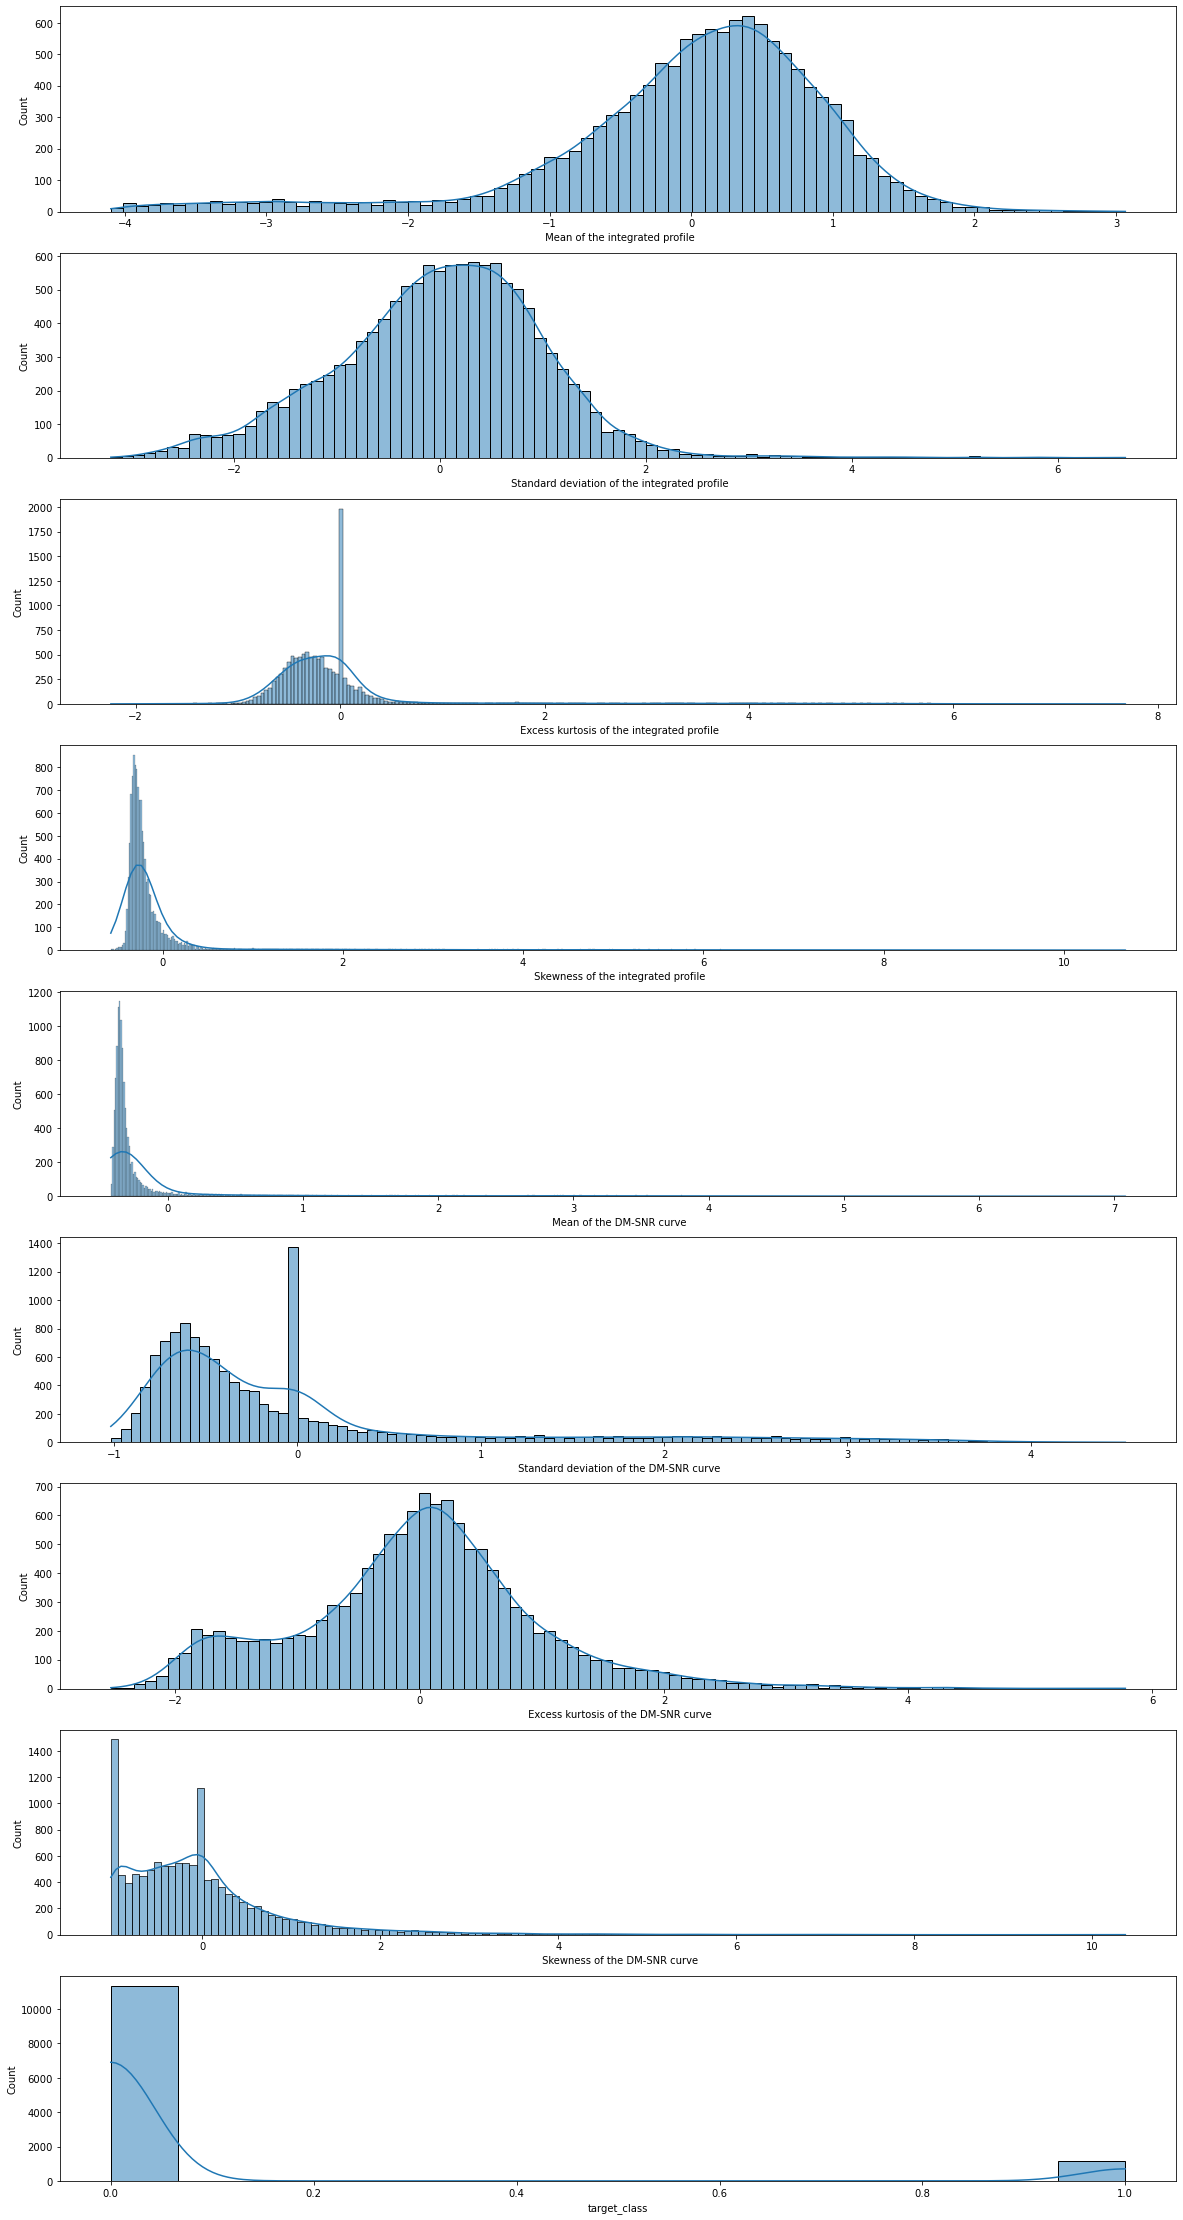

In [10]:
ShowColumnsDistribution(lab4_classification_data)

Можно отметить, что заполненные пропуски стали заметны: на многих признаках около середины графика есть скачок в плотности распределения.

In [11]:
lab4_classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [12]:
lab4_classification_data.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.393989,0.272252,-0.104295,-0.288585,-0.321013,-0.426029,-0.194818,-0.385611,0.0
1,-1.327257,-1.521273,0.237151,0.259381,-0.346990,-0.470410,0.238373,-0.026774,0.0
2,0.761306,0.986368,-0.349264,-0.334344,-0.335385,-0.213700,0.038556,-0.300859,0.0
3,1.766787,0.344739,-0.702837,-0.314056,0.161989,0.000000,-1.185162,-0.939302,0.0
4,-1.022022,-1.529786,0.350606,0.240922,-0.333804,-0.307165,0.015768,-0.279271,0.0
5,0.388207,0.096387,-0.251813,-0.271753,-0.359245,0.000000,0.267343,0.063105,0.0
6,-1.234743,-0.605702,0.591855,0.075053,4.355205,0.000000,-1.991863,-1.019531,0.0
7,-0.063712,1.380878,0.087593,-0.277405,-0.333550,-0.367249,0.244685,-0.077866,0.0
8,-0.624577,-0.926601,-0.132535,-0.100716,-0.334482,-0.435760,-0.106333,-0.331708,0.0
9,-0.073450,0.070697,-0.085374,-0.255812,-0.273408,0.000000,-0.580068,-0.660890,0.0


In [13]:
lab4_classification_data.to_csv("ML_Datasets/pulsar_train_prepared.csv")

Посмотрим также на корреляционную матрицу:

<AxesSubplot:>

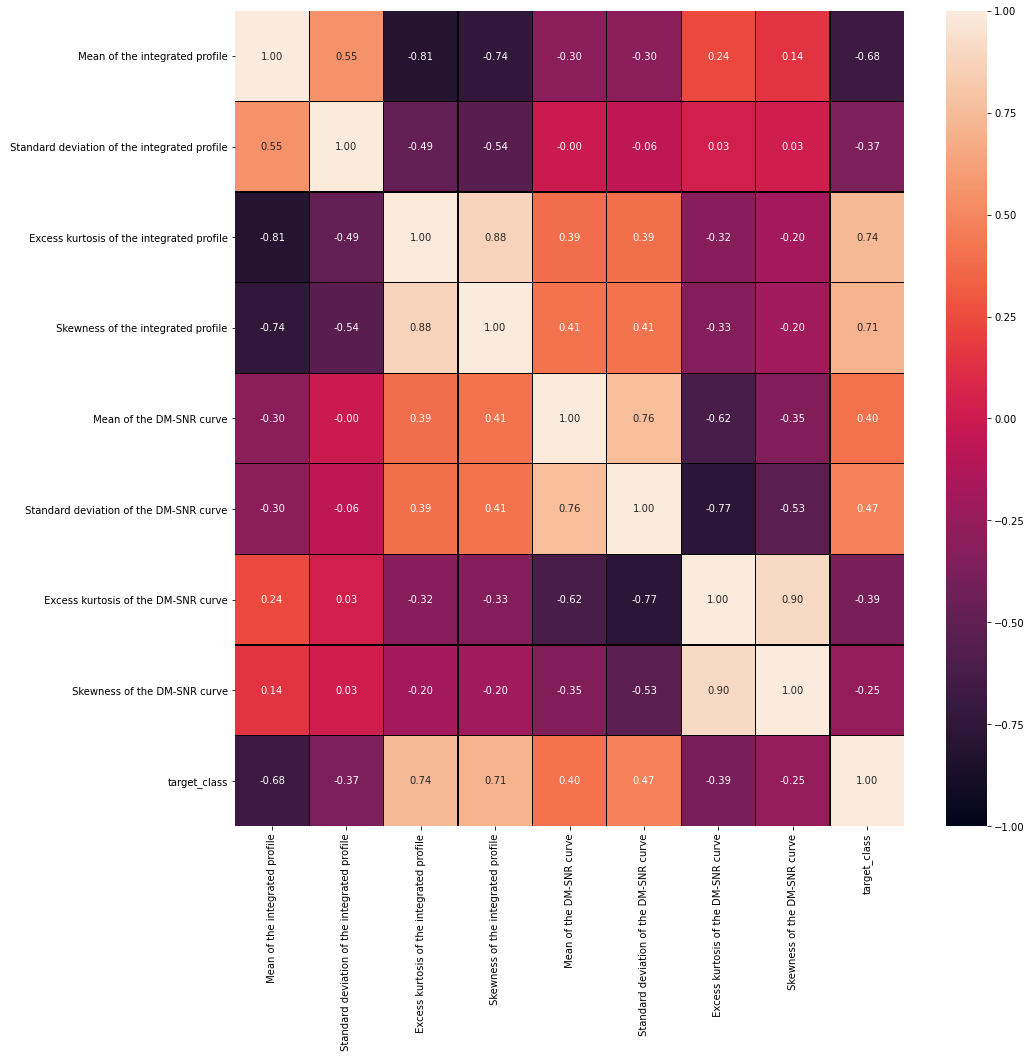

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(lab4_classification_data.corr(), ax=ax, annot=True, fmt=".2f", linewidths=0.3, linecolor="black", vmin = -1, vmax = 1)

Матрица содержит много значений, говорящих о существенной зависимости, поэтому имеем надежду на достойные результаты в линейных моделях.

Посмотрим на некоторые распределения признаков:

<AxesSubplot:xlabel=' Excess kurtosis of the DM-SNR curve', ylabel=' Skewness of the DM-SNR curve'>

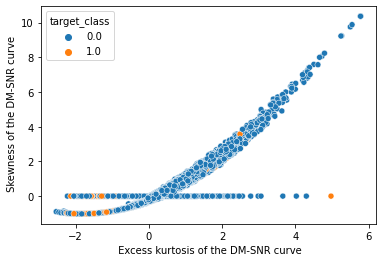

In [15]:
sns.scatterplot(x = columns[6], y = columns[7], data = lab4_classification_data, hue = columns[-1])

<AxesSubplot:xlabel=' Excess kurtosis of the integrated profile', ylabel=' Skewness of the integrated profile'>

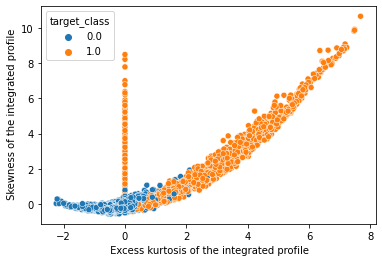

In [16]:
sns.scatterplot(x = columns[2], y = columns[3], data = lab4_classification_data, hue = columns[-1])

<AxesSubplot:xlabel=' Mean of the integrated profile', ylabel=' Standard deviation of the integrated profile'>

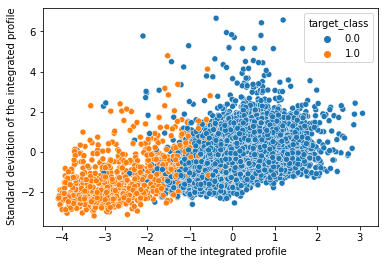

In [17]:
sns.scatterplot(x = columns[0], y = columns[1], data = lab4_classification_data, hue = columns[-1])

<AxesSubplot:xlabel=' Mean of the integrated profile', ylabel=' Skewness of the integrated profile'>

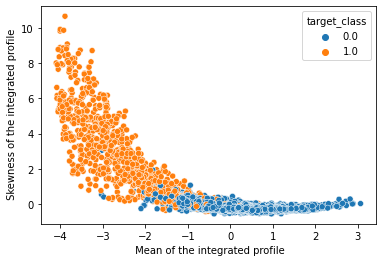

In [18]:
sns.scatterplot(x = columns[0], y = columns[3], data = lab4_classification_data, hue = columns[-1])

<AxesSubplot:xlabel=' Excess kurtosis of the integrated profile', ylabel=' Skewness of the DM-SNR curve'>

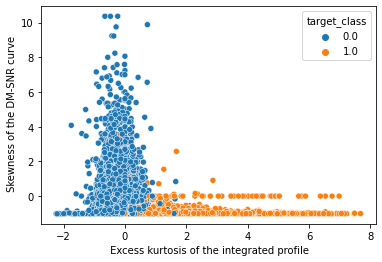

In [19]:
sns.scatterplot(x = columns[2], y = columns[7], data = lab4_classification_data, hue = columns[-1])

<AxesSubplot:xlabel=' Skewness of the integrated profile', ylabel=' Mean of the DM-SNR curve'>

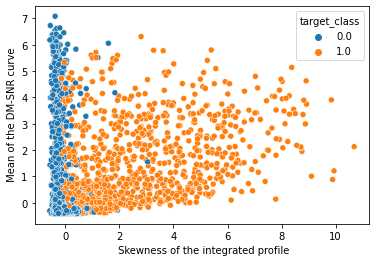

In [20]:
sns.scatterplot(x = columns[3], y = columns[4], data = lab4_classification_data, hue = columns[-1])

Последний шаг в подготовке - разделение выборок.

In [16]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 8


lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test = train_test_split(lab4_classification_data[columns[:-1]], 
                                                                                    lab4_classification_data[columns[-1]],
                                                                                    train_size = 0.85,
                                                                                    random_state = RANDOM_STATE)

lab4_cl_y_train = lab4_cl_y_train.astype("int32")
lab4_cl_y_test = lab4_cl_y_test.astype("int32")

### 2. Работа с линейной моделью

In [22]:
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix


def PrintClassificationMetrics(y_test, y_predicted):
    print("-Погрешность (accuracy, balanced) = {0};\
          \n-Меткость (precision, класс 1) = {1};\
          \n-Полнота (recall, класс 1) = {2};\
          \n-F1 (класс 1) = {3};\
          \n-ROC AUC = {4}.".format(balanced_accuracy_score(y_test, y_predicted),
                                   precision_score(y_test, y_predicted, average = "binary"),
                                   recall_score(y_test, y_predicted, average = "binary"),
                                   f1_score(y_test, y_predicted, average = "binary"),
                                   roc_auc_score(y_test, y_predicted)))
    
def FitPredictCl(model, x_train, x_test, y_train, y_test):
    solver = model
    solver.fit(x_train, y_train)
    prediction = solver.predict(x_test)
    PrintClassificationMetrics(y_test, prediction)
    plot_confusion_matrix(model, x_test, y_test)

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


def PrintDictionary(dict):
    for key, value in dict.items():
        print("\n{0} -> {1}".format(key, value))

Посмотрим на простейшую модель градиентного спуска с использованием квадратичной функции потерь:

In [24]:
from sklearn.linear_model import SGDClassifier

-Погрешность (accuracy, balanced) = 0.8598102361138282;          
-Меткость (precision, класс 1) = 0.9823008849557522;          
-Полнота (recall, класс 1) = 0.7207792207792207;          
-F1 (класс 1) = 0.8314606741573033;          
-ROC AUC = 0.8598102361138282.


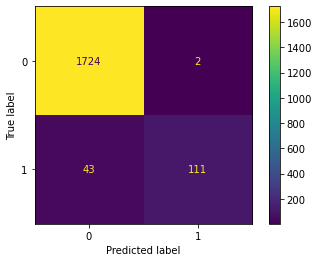

In [25]:
sgdc = SGDClassifier(loss = "squared_loss", random_state = RANDOM_STATE)
sgdc.fit(lab4_cl_x_train, lab4_cl_y_train)
lab4_cl_sgdc_prediction = sgdc.predict(lab4_cl_x_test)

FitPredictCl(sgdc, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Теперь обучим модель логистической регрессии:


0 -> {'precision': 0.9817455790074159, 'recall': 0.9971031286210892, 'f1-score': 0.9893647599885024, 'support': 1726}

1 -> {'precision': 0.9606299212598425, 'recall': 0.7922077922077922, 'f1-score': 0.8683274021352313, 'support': 154}

accuracy -> 0.9803191489361702

macro avg -> {'precision': 0.9711877501336292, 'recall': 0.8946554604144408, 'f1-score': 0.9288460810618668, 'support': 1880}

weighted avg -> {'precision': 0.98001589214937, 'recall': 0.9803191489361702, 'f1-score': 0.9794499976962664, 'support': 1880}


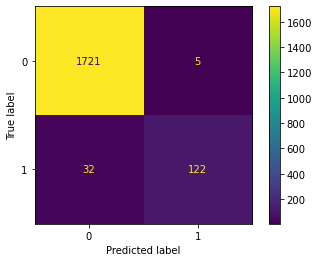

In [26]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(penalty = "none")
logreg.fit(lab4_cl_x_train, lab4_cl_y_train)
lab4_cl_logreg_prediction = logreg.predict(lab4_cl_x_test)

PrintDictionary(classification_report(lab4_cl_y_test, lab4_cl_logreg_prediction, output_dict = True))
plot_confusion_matrix(logreg, lab4_cl_x_test, lab4_cl_y_test)

Модель выдала достойные показатели, однако показатели обучения для второго класса слегка проседают, как и ожидалось изначально.

Попробуем применить различные уровни регуляризации к модели и оценить работу.

К метрике *Recall* специально была применена опция "binary", поскольку мы увидим безупречную работу модели на классе **0** и более слабую работу на классе **1**. То есть, в первую очередьмы оцениваем модели по качеству на классе **1**

In [27]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit,  cross_validate


cv_cl_scoring = ["recall"]

# Прогоняем для разных значений L1 в Elastic-Net.
# Поскольку при L1 = 0 мы получаем регуляризацию Тихонова, а при L1 = 1 - лассо, мы оценим все возможные виды регуляризации

for l1_param in np.arange(0., 1.001, 0.1):
    print("\nL1 =", l1_param)
    model = LogisticRegression(solver = "saga", penalty = "elasticnet", l1_ratio = l1_param)
    cv_results = cross_validate(model, 
                                lab4_classification_data[columns[:-1]], 
                                lab4_classification_data[columns[-1]], 
                                scoring = cv_cl_scoring,
                                cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                                n_jobs = 8)
    PrintDictionary(cv_results)
        
    model.fit(lab4_cl_x_train, lab4_cl_y_train)
    prediction = model.predict(lab4_cl_x_test)
    
    #print("\nДля регуляризации elasticnet с параметром L1 =", l1_param)
    #PrintClassificationMetrics(lab4_cl_y_test, prediction)



L1 = 0.0

fit_time -> [0.2299273  0.2119329  0.21893001 0.21792793 0.21692991 0.22892928]

score_time -> [0.00699711 0.00599742 0.00699759 0.00699878 0.00599909 0.00999594]

test_recall -> [0.79130435 0.77391304 0.82608696 0.76521739 0.82608696 0.75652174]

L1 = 0.1

fit_time -> [0.26191592 0.22492743 0.26791286 0.25491858 0.25991654 0.26691365]

score_time -> [0.00599813 0.00599861 0.00399923 0.00399828 0.00399923 0.00299859]

test_recall -> [0.79130435 0.77391304 0.82608696 0.76521739 0.82608696 0.75652174]

L1 = 0.2

fit_time -> [0.25691938 0.24192238 0.2619164  0.24392247 0.25291848 0.27191067]

score_time -> [0.01299524 0.00299931 0.0059979  0.01899385 0.0059979  0.00399828]

test_recall -> [0.79130435 0.77391304 0.82608696 0.76521739 0.82608696 0.75652174]

L1 = 0.30000000000000004

fit_time -> [0.25091934 0.24292254 0.2409215  0.24492145 0.23792315 0.24292088]

score_time -> [0.00299907 0.00299883 0.00399899 0.00299883 0.00399947 0.00299907]

test_recall -> [0.79130435 0.773913

Видим, что регуляризация никак не помогает. Таким образом, полученное качество линейной модели:

In [28]:
PrintClassificationMetrics(lab4_cl_y_test, lab4_cl_logreg_prediction)

-Погрешность (accuracy, balanced) = 0.8946554604144408;          
-Меткость (precision, класс 1) = 0.9606299212598425;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8683274021352313;          
-ROC AUC = 0.8946554604144407.


##### Дополнительное исследование

Вспомним про то, что у трёх колонок после масштабирования и заполнения пропусков были скачки в распределении (колонки с индексами 2, 5 и 7; те самые, где заполнялись пропуски). Посмотрим, как исключение этих колонок повлияет на показатели качества модели.

Результат может быть неоднозначный: 
- Признак 2 сильно зависим от целевого, но в то же время имеет две более сильных зависимости с нецелевыми признаки;
- Признак 5 зависит от целевого в средней степени (0.47) и тоже имеет две более сильных зависимости (0.76 и -0.77) с нецелевыми;
- Признак 7 зависит от целевого слабо и имеет практически линейную зависимость от признака 6 (0.9).

У нас получается шесть комбинаций с точки зрения исключения колонок. Опробуем все и посмотрим на показатели качества:

In [29]:
from itertools import combinations
from sklearn.metrics import confusion_matrix



def GetCombinations(array):
    combs = list()
    combs_length = 0
    
    for i in range(1, len(array) + 1):
        for combination in combinations(array, i):
            combs.append(combination)
            combs_length = combs_length + 1
    
    return combs, combs_length


def GetClassificationMetricsWithDeletedColumns(model, deleting_indexes):
    all_combinations, combinations_amount = GetCombinations(deleting_indexes)

    #fig, ax = plt.subplots(combinations_amount, 1, figsize=(8, combinations_amount * 8))

    for i in range(combinations_amount):
        combination = all_combinations[i]

        # Удаляем необходимые колонки
        trimmed_columns = columns.copy()
        for index in combination:
            trimmed_columns.pop(index)
        print("\nПри удалении колонок", combination)

        # Обучаем модель
        trimmed_data = lab4_classification_data[trimmed_columns]
        trimmed_cl_x_train, trimmed_cl_x_test, trimmed_cl_y_train, trimmed_cl_y_test = train_test_split(trimmed_data[trimmed_columns[:-1]],
                                                                                                        trimmed_data[trimmed_columns[-1]],
                                                                                                        train_size = 0.85,
                                                                                                        random_state = RANDOM_STATE)
        trimmed_logreg = model
        trimmed_logreg.fit(trimmed_cl_x_train, trimmed_cl_y_train)
        trimmed_cl_y_prediction = trimmed_logreg.predict(trimmed_cl_x_test)
        cm = confusion_matrix(trimmed_cl_y_test, trimmed_cl_y_prediction, labels = [0, 1])
        print(cm)

        # Строим тепловую карту
        #sns.heatmap(confusion_matrix(trimmed_cl_y_test, trimmed_cl_y_prediction, labels = [0, 1]), ax=ax[i], annot = True)

In [30]:
GetClassificationMetricsWithDeletedColumns(LogisticRegression(penalty = "none"), [7, 5, 2])


При удалении колонок (7,)
[[1721    5]
 [  32  122]]

При удалении колонок (5,)
[[1721    5]
 [  29  125]]

При удалении колонок (2,)
[[1721    5]
 [  36  118]]

При удалении колонок (7, 5)
[[1721    5]
 [  30  124]]

При удалении колонок (7, 2)
[[1721    5]
 [  36  118]]

При удалении колонок (5, 2)
[[1721    5]
 [  35  119]]

При удалении колонок (7, 5, 2)
[[1721    5]
 [  35  119]]


Много выжать из удаления колонок не получилось, ожидания не оправдались. Посмотрим на показатели качества у наилучшего варианта: 

In [31]:
columns_no5 = columns.copy()
columns_no5.pop(5)

no5_data = lab4_classification_data[columns_no5]
no5_cl_x_train, no5_cl_x_test, no5_cl_y_train, no5_cl_y_test = train_test_split(no5_data[columns_no5[:-1]],
                                                                                                no5_data[columns_no5[-1]],
                                                                                                train_size = 0.85,
                                                                                                random_state = RANDOM_STATE)
no5_logreg = LogisticRegression(penalty = "none")
no5_logreg.fit(no5_cl_x_train, no5_cl_y_train)
no5_cl_logreg_prediction = no5_logreg.predict(no5_cl_x_test)

In [32]:
print("Исходный набор данных:\n")
PrintDictionary(classification_report(lab4_cl_y_test, lab4_cl_logreg_prediction, output_dict = True))
print("\nНабор данных без колонки #5:\n")
PrintDictionary(classification_report(no5_cl_y_test, no5_cl_logreg_prediction, output_dict = True))

Исходный набор данных:


0 -> {'precision': 0.9817455790074159, 'recall': 0.9971031286210892, 'f1-score': 0.9893647599885024, 'support': 1726}

1 -> {'precision': 0.9606299212598425, 'recall': 0.7922077922077922, 'f1-score': 0.8683274021352313, 'support': 154}

accuracy -> 0.9803191489361702

macro avg -> {'precision': 0.9711877501336292, 'recall': 0.8946554604144408, 'f1-score': 0.9288460810618668, 'support': 1880}

weighted avg -> {'precision': 0.98001589214937, 'recall': 0.9803191489361702, 'f1-score': 0.9794499976962664, 'support': 1880}

Набор данных без колонки #5:


0.0 -> {'precision': 0.9834285714285714, 'recall': 0.9971031286210892, 'f1-score': 0.9902186421173763, 'support': 1726}

1.0 -> {'precision': 0.9615384615384616, 'recall': 0.8116883116883117, 'f1-score': 0.8802816901408451, 'support': 154}

accuracy -> 0.9819148936170212

macro avg -> {'precision': 0.9724835164835165, 'recall': 0.9043957201547004, 'f1-score': 0.9352501661291107, 'support': 1880}

weighted avg -> {'pr

In [33]:
print("Исходный набор данных:\n")
PrintClassificationMetrics(lab4_cl_y_test, lab4_cl_logreg_prediction)
print("\nНабор данных без колонки #5:\n")
PrintClassificationMetrics(no5_cl_y_test, no5_cl_logreg_prediction)

Исходный набор данных:

-Погрешность (accuracy, balanced) = 0.8946554604144408;          
-Меткость (precision, класс 1) = 0.9606299212598425;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8683274021352313;          
-ROC AUC = 0.8946554604144407.

Набор данных без колонки #5:

-Погрешность (accuracy, balanced) = 0.9043957201547004;          
-Меткость (precision, класс 1) = 0.9615384615384616;          
-Полнота (recall, класс 1) = 0.8116883116883117;          
-F1 (класс 1) = 0.8802816901408451;          
-ROC AUC = 0.9043957201547005.


### 3. Работа с машиной опорных векторов

In [29]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### LinearSVC

Посмотрим на работу при различных значениях параметров.

In [35]:
lsvc_range = np.array(np.geomspace(1e-08, 1e+00, num = 9))

cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

lsvc_grid = GridSearchCV(estimator = LinearSVC(max_iter = 1e+06),
                         param_grid = [{"C" : lsvc_range}],
                         cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)
lsvc_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=6, random_state=8, test_size=None,
            train_size=None),
             estimator=LinearSVC(max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00])}],
             refit=False,
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

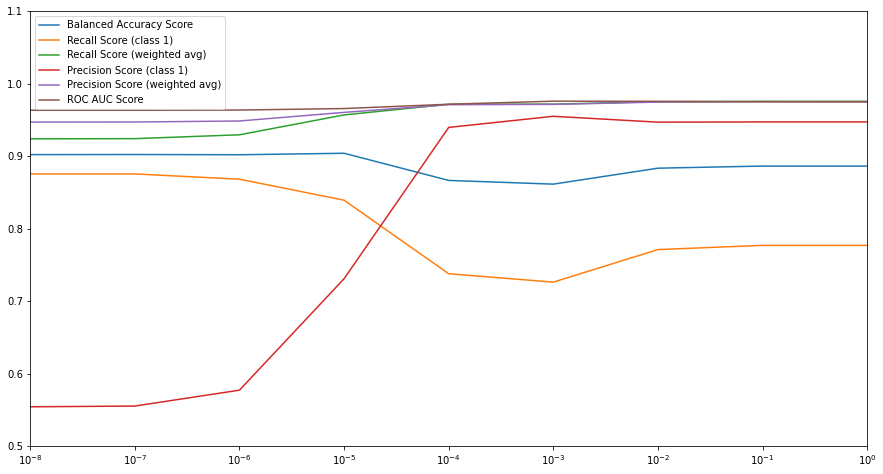

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(lsvc_range, lsvc_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1)
plt.ylim(0.5, 1.1)
plt.xticks(lsvc_range)
plt.legend(loc="best")

plt.show()

Результаты не совсем однозначны, ибо при увеличении параметра для класса **1**  видим колоссальное снижение прогнозов **False Positive** и небольшое повышение **False Negative** (то есть, увеличивается *Precision*, но уменьшается *Recall*).

С точки зрения задачи сказать, какой показатель важнее, сложно. Посмотрим на оба варианта. **C = 10^-8**:

-Погрешность (accuracy, balanced) = 0.9021007960753036;          
-Меткость (precision, класс 1) = 0.5192307692307693;          
-Полнота (recall, класс 1) = 0.8766233766233766;          
-F1 (класс 1) = 0.6521739130434783;          
-ROC AUC = 0.9021007960753037.


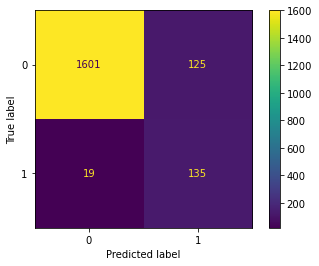

In [41]:
lsvc = LinearSVC(C = 1e-08, max_iter = 1e+06)

lsvc.fit(lab4_cl_x_train, lab4_cl_y_train)
lsvc_prediction = lsvc.predict(lab4_cl_x_test)

FitPredictCl(lsvc, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

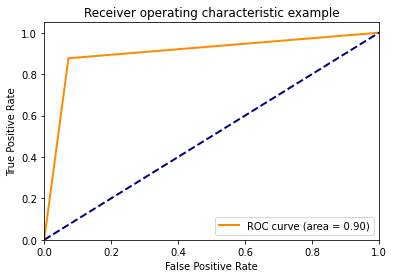

In [42]:
from sklearn.metrics import roc_curve


# Из лекции
def draw_roc_curve(y_true, y_score, pos_label, average = None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

draw_roc_curve(lab4_cl_y_test, lsvc_prediction, pos_label = 1)   

**C = 10^-1**:

-Погрешность (accuracy, balanced) = 0.8822478217032099;          
-Меткость (precision, класс 1) = 0.9752066115702479;          
-Полнота (recall, класс 1) = 0.7662337662337663;          
-F1 (класс 1) = 0.8581818181818182;          
-ROC AUC = 0.88224782170321.


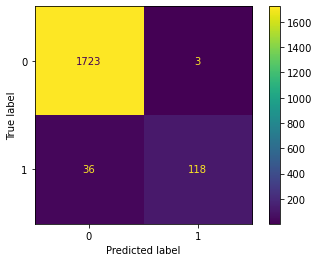

In [43]:
lsvc = LinearSVC(C = 1e-01, max_iter = 1e+06)

lsvc.fit(lab4_cl_x_train, lab4_cl_y_train)
lsvc_prediction = lsvc.predict(lab4_cl_x_test)

FitPredictCl(lsvc, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

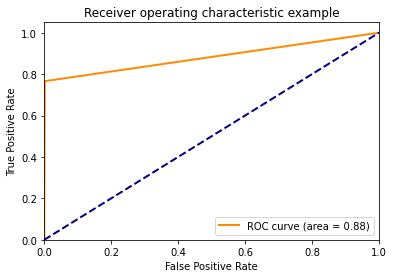

In [44]:
draw_roc_curve(lab4_cl_y_test, lsvc_prediction, pos_label = 1)

##### Дополнительное исследование

Остановимся на модели с **C = 0.1**. Снова попробуем поиграться с удалением колонок:

In [45]:
GetClassificationMetricsWithDeletedColumns(LinearSVC(C = 0.1, max_iter = 1e+06), [7, 5, 2])


При удалении колонок (7,)
[[1723    3]
 [  36  118]]

При удалении колонок (5,)
[[1723    3]
 [  36  118]]

При удалении колонок (2,)
[[1724    2]
 [  38  116]]

При удалении колонок (7, 5)
[[1723    3]
 [  36  118]]

При удалении колонок (7, 2)
[[1724    2]
 [  38  116]]

При удалении колонок (5, 2)
[[1724    2]
 [  37  117]]

При удалении колонок (7, 5, 2)
[[1724    2]
 [  38  116]]


Однозначного улучшения нет.

#### SVC
Проверим линейное, полиномиальное и радиально-базисное ядра в работе.
##### Линейное ядро

In [46]:
svc_range = np.array(np.geomspace(1e-08, 1e+02, num = 11))

cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

svc_lk_grid = GridSearchCV(estimator = SVC(kernel = "linear", max_iter = 1e+06),
                         param_grid = [{"C" : svc_range}],
                         cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)
svc_lk_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=6, random_state=8, test_size=None,
            train_size=None),
             estimator=SVC(kernel='linear', max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02])}],
             refit=False,
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

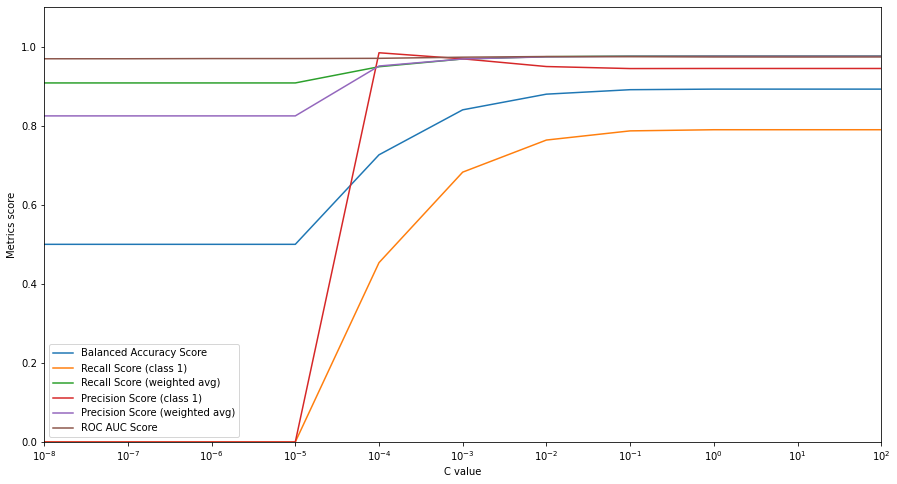

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svc_range, svc_lk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1)
plt.ylim(0, 1.1)
plt.xticks(svc_range)
plt.legend(loc="best")
plt.xlabel("C value")
plt.ylabel("Metrics score")

plt.show()

-Погрешность (accuracy, balanced) = 0.8949451475523318;          
-Меткость (precision, класс 1) = 0.9682539682539683;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8714285714285714;          
-ROC AUC = 0.8949451475523317.


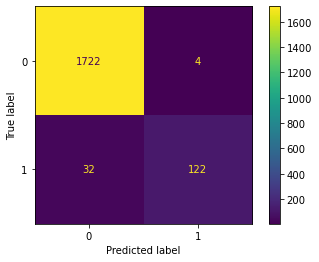

In [80]:
svc_lk = SVC(kernel = "linear", C = 1, max_iter = 1e+06)
svc_lk.fit(lab4_cl_x_train, lab4_cl_y_train)
svc_lk_prediction = svc_lk.predict(lab4_cl_x_test)

FitPredictCl(svc_lk, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Видим небольшой прирост в сравнении с предыдущим вариантом, но в целом результат тот же.

*Удаление колонок:*

In [49]:
GetClassificationMetricsWithDeletedColumns(svc_lk, [7, 5, 2])


При удалении колонок (7,)
[[1722    4]
 [  32  122]]

При удалении колонок (5,)
[[1722    4]
 [  32  122]]

При удалении колонок (2,)
[[1721    5]
 [  37  117]]

При удалении колонок (7, 5)
[[1721    5]
 [  32  122]]

При удалении колонок (7, 2)
[[1721    5]
 [  37  117]]

При удалении колонок (5, 2)
[[1722    4]
 [  37  117]]

При удалении колонок (7, 5, 2)
[[1721    5]
 [  37  117]]


Результата нет.

##### Полиномиальное ядро

In [50]:
cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

svc_pk_c_range = np.array(np.geomspace(1e-08, 1e+02, num = 11))
svc_pk_degree_range = np.array([2, 3, 4, 5])

svc_pk_grid = GridSearchCV(estimator = SVC(kernel = "poly", max_iter = 1e+07),
                         param_grid = [{"C" : svc_pk_c_range, "degree" : svc_pk_degree_range}],
                         n_jobs = 8,
                         cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = "Recall Score (class 1)")

svc_pk_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=6, random_state=8, test_size=None,
            train_size=None),
             estimator=SVC(kernel='poly', max_iter=10000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02]),
                          'degree': array([2, 3, 4, 5])}],
             refit='Recall Score (class 1)',
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

In [51]:
def GetPolyScoresByParamAndDegree(param_value, degree_value, param_range, degree_range, grid_results, metric):
    # Найдём положение значения параметра в сетке результатов
    param_position = param_range.index(param_value)
    # Аналогично для степени
    degree_position = degree_range.index(degree_value)
    return grid_results[metric][param_position * 4 + degree_position]
    

Посмотрим на то, как изменяются значения:

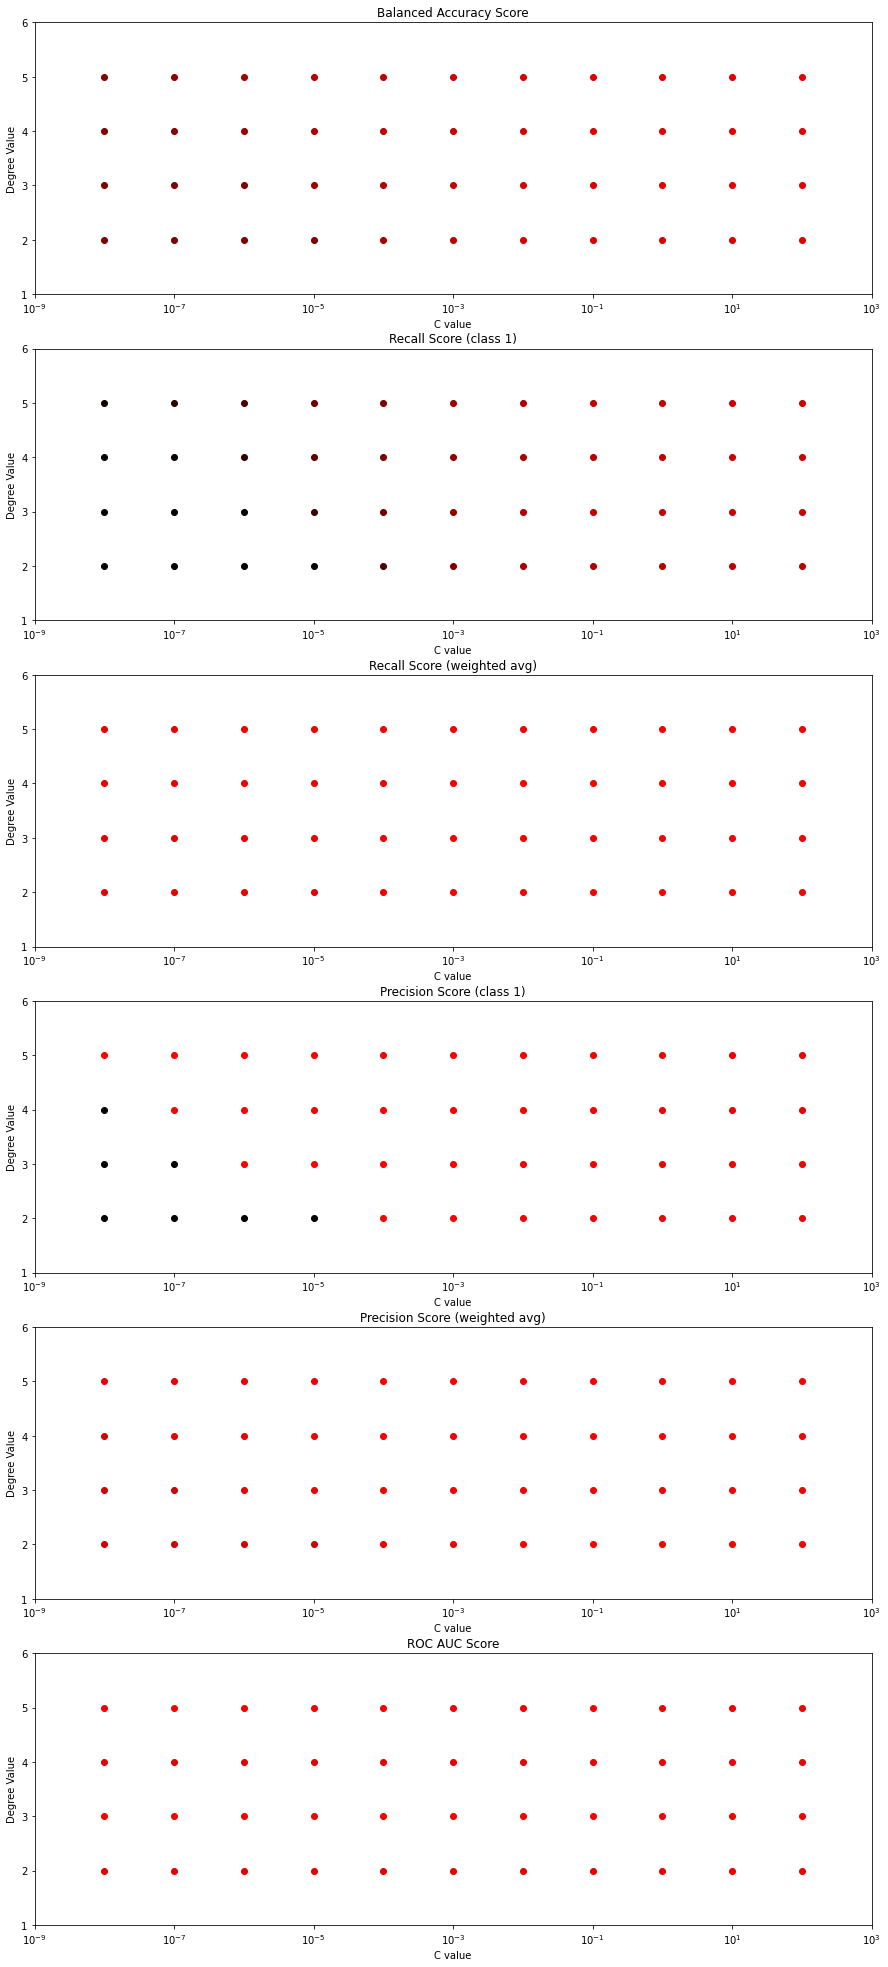

In [52]:
from itertools import product


fig, ax = plt.subplots(len(cv_scoring_strategies), 1, figsize=(15, 35))

dots = [list(x) for x in product(*[svc_pk_c_range, svc_pk_degree_range])]

for i in range(len(cv_scoring_strategies)):
    strategy = list(cv_scoring_strategies.keys())[i]
    for dot in dots:
        ax[i].plot(dot[0], dot[1], marker = 'o', color = (GetPolyScoresByParamAndDegree(dot[0], dot[1], 
                                                                   svc_pk_c_range.tolist(), 
                                                                   svc_pk_degree_range.tolist(), 
                                                                   svc_pk_grid.cv_results_, 
                                                                   "mean_test_{}".format(strategy)),
                                                                0, 
                                                                0))
    ax[i].set_title(strategy)
    ax[i].set_xlabel("C value")
    ax[i].set_ylabel("Degree Value")
    
    ax[i].set_xscale("log")
    ax[i].set_xlim(1e-09, 1e+03)
    ax[i].set_ylim(svc_pk_degree_range[0] - 1, svc_pk_degree_range[-1] + 1)


По визуализации сверху видим, что модель на полиномиальном ядре в большей степени зависит от параметра С, чем от степени. Это вполне ожидаемый результат: данные хорошо обобщаются на линейных моделях и в полиномах нет необходимости.

Смотрим на наилучшие показатели:

-Погрешность (accuracy, balanced) = 0.8940760861386585;          
-Меткость (precision, класс 1) = 0.9457364341085271;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8621908127208481;          
-ROC AUC = 0.8940760861386585.


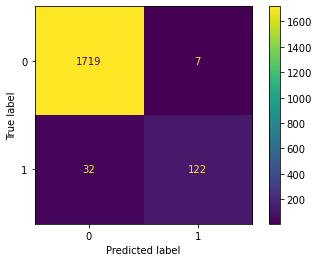

In [77]:
svc_pk = svc_pk_grid.best_estimator_
svc_pk.fit(lab4_cl_x_train, lab4_cl_y_train)
svc_pk_prediction = svc_pk.predict(lab4_cl_x_test)

FitPredictCl(svc_pk, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Видим схожий с линейными моделями результат.

Теперь по традиции поглядим на варианты с удалением колонок:

In [54]:
GetClassificationMetricsWithDeletedColumns(svc_pk, [7, 5, 2])


При удалении колонок (7,)
[[1719    7]
 [  32  122]]

При удалении колонок (5,)
[[1721    5]
 [  29  125]]

При удалении колонок (2,)
[[1721    5]
 [  33  121]]

При удалении колонок (7, 5)
[[1720    6]
 [  28  126]]

При удалении колонок (7, 2)
[[1720    6]
 [  34  120]]

При удалении колонок (5, 2)
[[1721    5]
 [  33  121]]

При удалении колонок (7, 5, 2)
[[1719    7]
 [  34  120]]


Видим, что лучший результат дали два варианта - без колонки 5 и без колонок 5 и 7.

In [56]:
no5_svc_pk = svc_pk_grid.best_estimator_
no5_svc_pk.fit(no5_cl_x_train, no5_cl_y_train)
no5_cl_svc_pk_prediction = no5_svc_pk.predict(no5_cl_x_test)

columns_no57 = columns.copy()
columns_no57.pop(7)
columns_no57.pop(5)

no57_data = lab4_classification_data[columns_no57]
no57_cl_x_train, no57_cl_x_test, no57_cl_y_train, no57_cl_y_test = train_test_split(no57_data[columns_no57[:-1]],
                                                                                                no57_data[columns_no57[-1]],
                                                                                                train_size = 0.85,
                                                                                                random_state = RANDOM_STATE)
no57_svc_pk = svc_pk_grid.best_estimator_
no57_svc_pk.fit(no57_cl_x_train, no57_cl_y_train)
no57_cl_svc_pk_prediction = no57_svc_pk.predict(no57_cl_x_test)


print("\nНабор данных без колонки #5:\n")
PrintClassificationMetrics(no5_cl_y_test, no5_cl_svc_pk_prediction)
print("\nНабор данных без колонок #5 и #7:\n")
PrintClassificationMetrics(no57_cl_y_test, no57_cl_svc_pk_prediction)


Набор данных без колонки #5:

-Погрешность (accuracy, balanced) = 0.9043957201547004;          
-Меткость (precision, класс 1) = 0.9615384615384616;          
-Полнота (recall, класс 1) = 0.8116883116883117;          
-F1 (класс 1) = 0.8802816901408451;          
-ROC AUC = 0.9043957201547005.

Набор данных без колонок #5 и #7:

-Погрешность (accuracy, balanced) = 0.9073527862635626;          
-Меткость (precision, класс 1) = 0.9545454545454546;          
-Полнота (recall, класс 1) = 0.8181818181818182;          
-F1 (класс 1) = 0.881118881118881;          
-ROC AUC = 0.9073527862635626.


*Исследование полиномиального ядра, оставшееся за кадром: при снижении параметра max_iter до 10000 показатели качества на значениях C > 1 начинают резко проседать. Precision стал < 0.1, F1 [0.1; 0;15], ROC [0.3; 0.5]*

Остановимся на варианте, где нет только колонки 5, так как он однозначно лучше исходного, а от дополнительного удаления 7-й колонки результаты неоднозначные.

##### Радиально-базисное ядро

In [57]:
cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

svc_rbk_c_range = np.array(np.geomspace(1e-08, 1e+05, num = 14))

svc_rbk_grid = GridSearchCV(estimator = SVC(kernel = "rbf", max_iter = 1e+06),
                         param_grid = [{"C" : svc_rbk_c_range}],
                         n_jobs = 8,
                         cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = False)

svc_rbk_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=6, random_state=8, test_size=None,
            train_size=None),
             estimator=SVC(max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])}],
             refit=False,
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

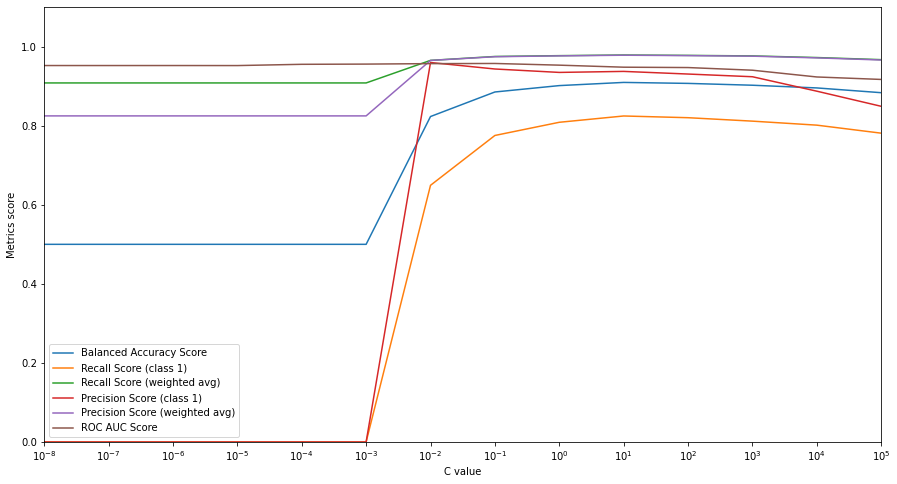

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svc_rbk_c_range, svc_rbk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1)
plt.ylim(0, 1.1)
plt.xticks(svc_rbk_c_range)
plt.legend(loc="best")
plt.xlabel("C value")
plt.ylabel("Metrics score")

plt.show()

Выберем параметр **C = 10**

-Погрешность (accuracy, balanced) = 0.9105995395103159;          
-Меткость (precision, класс 1) = 0.9548872180451128;          
-Полнота (recall, класс 1) = 0.8246753246753247;          
-F1 (класс 1) = 0.8850174216027875;          
-ROC AUC = 0.9105995395103158.


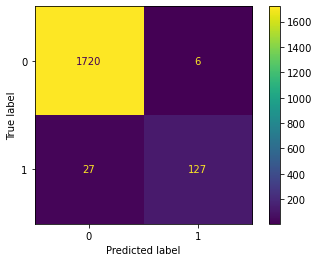

In [85]:
svc_rbk = SVC(kernel = "rbf", C = 10, max_iter = 1e+06)
svc_rbk.fit(lab4_cl_x_train, lab4_cl_y_train)
svc_rbk_prediction = svc_rbk.predict(lab4_cl_x_test)

FitPredictCl(svc_rbk, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Видим, что данное ядро показало наилучшие результаты. 

Посмотрим на удаление колонок:

In [60]:
GetClassificationMetricsWithDeletedColumns(svc_rbk, [7, 5, 2])


При удалении колонок (7,)
[[1718    8]
 [  27  127]]

При удалении колонок (5,)
[[1719    7]
 [  30  124]]

При удалении колонок (2,)
[[1718    8]
 [  32  122]]

При удалении колонок (7, 5)
[[1718    8]
 [  30  124]]

При удалении колонок (7, 2)
[[1717    9]
 [  32  122]]

При удалении колонок (5, 2)
[[1717    9]
 [  30  124]]

При удалении колонок (7, 5, 2)
[[1717    9]
 [  31  123]]


Радиально-базисное ядро было обучено оптимальным образом, исключение признаков ничего не даёт.

### 4. Деревья решений

In [61]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import graphviz 
import pydotplus

Для начала посмотрим на работу произвольной модели

-Погрешность (accuracy, balanced) = 0.9066041143097923;          
-Меткость (precision, класс 1) = 0.8050314465408805;          
-Полнота (recall, класс 1) = 0.8311688311688312;          
-F1 (класс 1) = 0.817891373801917;          
-ROC AUC = 0.9066041143097923.


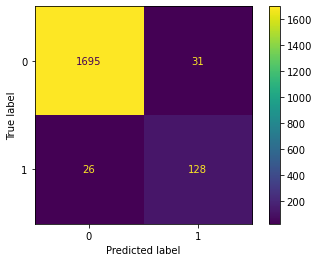

In [88]:
tree_cl = DecisionTreeClassifier(random_state = RANDOM_STATE)
tree_cl.fit(lab4_cl_x_train, lab4_cl_y_train)
tree_cl_prediction = tree_cl.predict(lab4_cl_x_test)

FitPredictCl(tree_cl, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Неплохие показатели "из коробки"! Посмотрим на то, как влияют различные настройки дерева при работе...

In [63]:
from sklearn import tree

In [64]:
cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

max_depth_range = np.array(range(2, 20))

tree_cl_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = RANDOM_STATE),
                         param_grid = [{"max_depth" : max_depth_range}],
                         cv = StratifiedShuffleSplit(n_splits = 8, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = False)
tree_cl_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=8, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=8),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])}],
             refit=False,
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

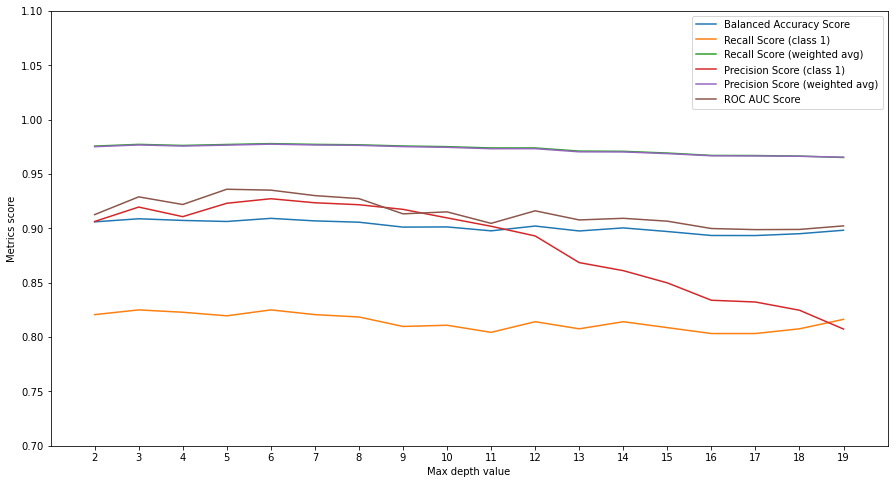

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(max_depth_range, tree_cl_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

plt.xlim(max_depth_range[0] - 1, max_depth_range[-1] + 1)
plt.ylim(0.7, 1.1)
plt.xticks(max_depth_range)
plt.legend(loc="best")
plt.xlabel("Max depth value")
plt.ylabel("Metrics score")

plt.show()

Переобучение становится заметным примерно после 8 слоя дерева: в таком случае показатели качества для класса **1** существенно снижаются.

Теперь проведём решётчатый поиск на многомерной сетке параметров: max_depth, min_samples_split, min_samples_leaf.

In [66]:
cv_scoring_strategies = {"Balanced Accuracy Score" : "balanced_accuracy", 
                         "Recall Score (class 1)" : "recall",
                         "Recall Score (weighted avg)" : "recall_weighted",
                         "Precision Score (class 1)" : "precision",
                         "Precision Score (weighted avg)" : "precision_weighted",
                         "ROC AUC Score" : "roc_auc"}

max_depth_range = np.array(range(1, 7))
min_samples_split_range = np.arange(0.001, 0.301, 0.1)
min_samples_leaf_range = np.arange(0.0, 0.021, 0.002)

tree_cl_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = RANDOM_STATE),
                         param_grid = [{"max_depth" : max_depth_range, 
                                        "min_samples_split" : min_samples_split_range,
                                        "min_samples_leaf" : min_samples_leaf_range}],
                         cv = StratifiedShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = "Recall Score (class 1)")

tree_cl_grid.fit(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]])

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.85821808 0.85821808 0.85821808
 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808
 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808
 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808
 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808 0.85821808
 0.85821808 0.85821808 0.85821808        nan        nan        nan
 0.90415552 0.90717761 0.90717761 0.90581684 0.90717761 0.90717761
 0.90531189 0.90717761 0.90717761 0.89886338 0.90717761 0.90717761
 0.89480846 0.90790224 0.90790224 0.9084072  0.9084072  0.9084072
 0.91101284 0.91101284 0.91101284 0.91397697 0.91397697 0.91397697
 0.91050024 0.91050024 0.91050024 0.896096   0.896096   0.896096
        nan        nan        nan 0.89937597 0.90717761 0.90717761
 0.9032112  0.90717761 0.90717761 0.90270625 0.90717761 0.90717761
 0

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=6, random_state=8, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=8), n_jobs=8,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6]),
                          'min_samples_leaf': array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
       0.018, 0.02 ]),
                          'min_samples_split': array([0.001, 0.101, 0.201])}],
             refit='Recall Score (class 1)',
             scoring={'Balanced Accuracy Score': 'balanced_accuracy',
                      'Precision Score (class 1)': 'precision',
                      'Precision Score (weighted avg)': 'precision_weighted',
                      'ROC AUC Score': 'roc_auc',
                      'Recall Score (class 1)': 'recall',
                      'Recall Score (weighted avg)': 'recall_weighted'})

In [67]:
tree_cl_grid.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=0.016,
                       min_samples_split=0.001, random_state=8)

In [68]:
tree_cl_grid.best_score_

0.8434782608695652

-Погрешность (accuracy, balanced) = 0.922777685813607;          
-Меткость (precision, класс 1) = 0.868421052631579;          
-Полнота (recall, класс 1) = 0.8571428571428571;          
-F1 (класс 1) = 0.8627450980392157;          
-ROC AUC = 0.922777685813607.


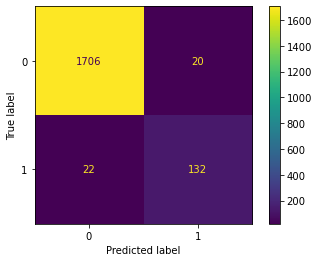

In [69]:
tree_cl = tree_cl_grid.best_estimator_

FitPredictCl(tree_cl, lab4_cl_x_train, lab4_cl_x_test, lab4_cl_y_train, lab4_cl_y_test)

Посмотрим на важность признаков:

In [70]:
print(*zip(range(len(columns)), tree_cl.feature_importances_), sep="\n")

(0, 0.0)
(1, 0.0)
(2, 0.07327392554452114)
(3, 0.9267260744554788)
(4, 0.0)
(5, 0.0)
(6, 0.0)
(7, 0.0)


Распределение значимостей такого, что получаем практически двумерную линейную регрессию.

Обучим дерево на самом важном признаке:

-Погрешность (accuracy, balanced) = 0.8397014341394411;          
-Меткость (precision, класс 1) = 0.689873417721519;          
-Полнота (recall, класс 1) = 0.7077922077922078;          
-F1 (класс 1) = 0.6987179487179487;          
-ROC AUC = 0.8397014341394411.


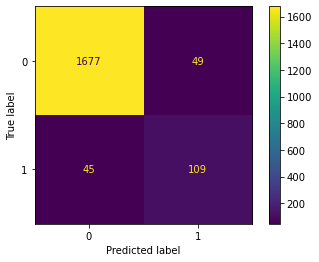

In [71]:
x_train_important = np.array(lab4_cl_x_train[columns[3]]).reshape(-1, 1)
x_test_important = np.array(lab4_cl_x_test[columns[3]]).reshape(-1, 1)

tree_cl_important = DecisionTreeClassifier(random_state = RANDOM_STATE)

FitPredictCl(tree_cl_important, x_train_important, x_test_important, lab4_cl_y_train, lab4_cl_y_test)

А если обучить таким образом другие модели?

In [72]:
#print(*[logreg, lsvc, svc_lk, svc_pk, svc_rbk])

for model in [LogisticRegression(penalty='none'), LinearSVC(C=0.01, max_iter=10000000.0), SVC(C=1, kernel='linear'), SVC(C=100.0, kernel='poly'), SVC(C=10)]:
    print(model)
    model.fit(x_train_important, lab4_cl_y_train)
    model_prediction = model.predict(x_test_important)
    
    PrintClassificationMetrics(lab4_cl_y_test, model_prediction)
    print(confusion_matrix(lab4_cl_y_test, model_prediction, labels = [0, 1]))
    

LogisticRegression(penalty='none')
-Погрешность (accuracy, balanced) = 0.8621879279469082;          
-Меткость (precision, класс 1) = 0.9572649572649573;          
-Полнота (recall, класс 1) = 0.7272727272727273;          
-F1 (класс 1) = 0.8265682656826568;          
-ROC AUC = 0.8621879279469082.
[[1721    5]
 [  42  112]]
LinearSVC(C=0.01, max_iter=10000000.0)
-Погрешность (accuracy, balanced) = 0.8435764698800621;          
-Меткость (precision, класс 1) = 0.9814814814814815;          
-Полнота (recall, класс 1) = 0.6883116883116883;          
-F1 (класс 1) = 0.8091603053435115;          
-ROC AUC = 0.8435764698800621.
[[1724    2]
 [  48  106]]
SVC(C=1, kernel='linear')
-Погрешность (accuracy, balanced) = 0.8468232231268152;          
-Меткость (precision, класс 1) = 0.981651376146789;          
-Полнота (recall, класс 1) = 0.6948051948051948;          
-F1 (класс 1) = 0.8136882129277566;          
-ROC AUC = 0.8468232231268152.
[[1724    2]
 [  47  107]]
SVC(C=100.0, kernel='poly

Видим, что *Precision* стремится к единице, но страдает *Recall*.

Напоследок получим визуализацию оптимального дерева:

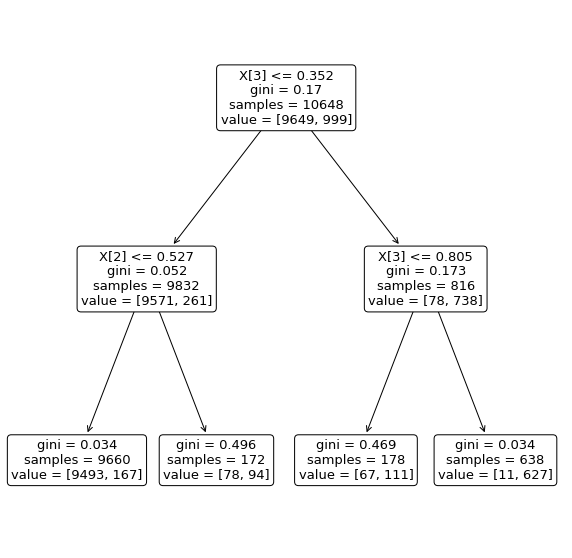

In [73]:
fig = plt.figure(figsize = (10, 10))
tree.plot_tree(tree_cl, rounded = True)
plt.savefig("tree.png", dpi = fig.dpi)
plt.show()

### Итоги
Все модели демонстрируют достойное качество предсказания класса. Тем не менее, из-за перекоса выборки в сторону класса **0** (или не случившегося события) имеется существенное количество ошибок первого рода.

Приведём показатели всех обученных моделей.
##### Линейная модель

LogisticRegression(penalty='none') 

-Погрешность (accuracy, balanced) = 0.8946554604144408;          
-Меткость (precision, класс 1) = 0.9606299212598425;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8683274021352313;          
-ROC AUC = 0.8946554604144407.


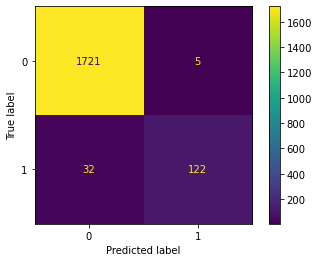

In [74]:
print(logreg, "\n")
PrintClassificationMetrics(lab4_cl_y_test, lab4_cl_logreg_prediction)
plot_confusion_matrix(logreg, lab4_cl_x_test, lab4_cl_y_test)

##### LinearSVC

LinearSVC(C=0.1, max_iter=1000000.0) 

-Погрешность (accuracy, balanced) = 0.8822478217032099;          
-Меткость (precision, класс 1) = 0.9752066115702479;          
-Полнота (recall, класс 1) = 0.7662337662337663;          
-F1 (класс 1) = 0.8581818181818182;          
-ROC AUC = 0.88224782170321.


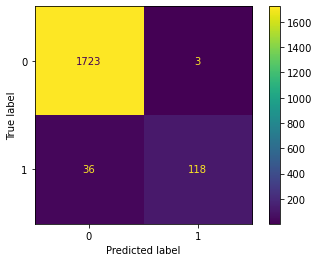

In [76]:
print(lsvc, "\n")
PrintClassificationMetrics(lab4_cl_y_test, lsvc_prediction)
plot_confusion_matrix(lsvc, lab4_cl_x_test, lab4_cl_y_test)

##### SVC на линейном ядре

SVC(C=1, kernel='linear', max_iter=1000000.0) 

-Погрешность (accuracy, balanced) = 0.8949451475523318;          
-Меткость (precision, класс 1) = 0.9682539682539683;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8714285714285714;          
-ROC AUC = 0.8949451475523317.


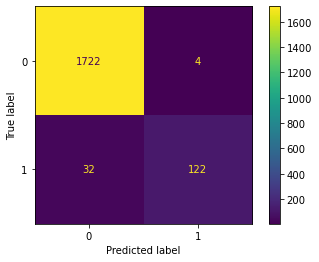

In [81]:
print(svc_lk, "\n")

svc_lk.fit(lab4_cl_x_train, lab4_cl_y_train)
PrintClassificationMetrics(lab4_cl_y_test, svc_lk_prediction)
plot_confusion_matrix(svc_lk, lab4_cl_x_test, lab4_cl_y_test)

##### SVC на полиномиальном ядре

SVC(C=100.0, kernel='poly', max_iter=10000000.0) 

-Погрешность (accuracy, balanced) = 0.8940760861386585;          
-Меткость (precision, класс 1) = 0.9457364341085271;          
-Полнота (recall, класс 1) = 0.7922077922077922;          
-F1 (класс 1) = 0.8621908127208481;          
-ROC AUC = 0.8940760861386585.


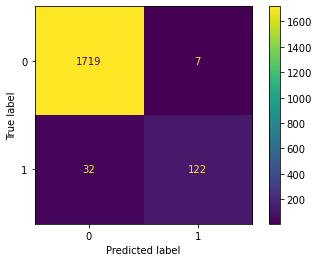

In [82]:
print(svc_pk, "\n")

svc_pk.fit(lab4_cl_x_train, lab4_cl_y_train)
PrintClassificationMetrics(lab4_cl_y_test, svc_pk_prediction)
plot_confusion_matrix(svc_pk, lab4_cl_x_test, lab4_cl_y_test)

##### SVC на радиально-базисном ядре

SVC(C=10, max_iter=1000000.0) 

-Погрешность (accuracy, balanced) = 0.9105995395103159;          
-Меткость (precision, класс 1) = 0.9548872180451128;          
-Полнота (recall, класс 1) = 0.8246753246753247;          
-F1 (класс 1) = 0.8850174216027875;          
-ROC AUC = 0.9105995395103158.


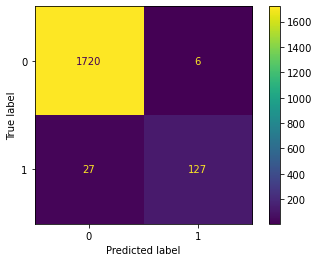

In [86]:
print(svc_rbk, "\n")

svc_rbk.fit(lab4_cl_x_train, lab4_cl_y_train)
PrintClassificationMetrics(lab4_cl_y_test, svc_rbk_prediction)
plot_confusion_matrix(svc_rbk, lab4_cl_x_test, lab4_cl_y_test)

##### Дерево решений

DecisionTreeClassifier(random_state=8) 

-Погрешность (accuracy, balanced) = 0.9066041143097923;          
-Меткость (precision, класс 1) = 0.8050314465408805;          
-Полнота (recall, класс 1) = 0.8311688311688312;          
-F1 (класс 1) = 0.817891373801917;          
-ROC AUC = 0.9066041143097923.


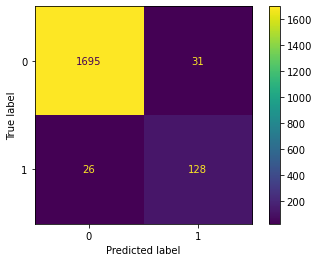

In [89]:
print(tree_cl, "\n")

tree_cl.fit(lab4_cl_x_train, lab4_cl_y_train)
PrintClassificationMetrics(lab4_cl_y_test, tree_cl_prediction)
plot_confusion_matrix(tree_cl, lab4_cl_x_test, lab4_cl_y_test)

### Дополнительные эксперименты
Подглянем в лекцию для магистров и воспользуемся методом восстановления баланса выборки, после чего сравним результаты

In [10]:
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.neighbors import KNeighborsClassifier

In [17]:
iht = InstanceHardnessThreshold(random_state = RANDOM_STATE, cv = 8, n_jobs = 8)
iht_x, iht_y = iht.fit_resample(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]].astype("int32"))
print(iht_y.value_counts())

iht_x_train, iht_x_test, iht_y_train, iht_y_test = train_test_split(iht_x, iht_y, random_state = RANDOM_STATE, train_size = 0.85)

0    6859
1    1153
Name: target_class, dtype: int64


In [21]:
temp = iht_x.join(iht_y)
temp.to_csv("ML_Datasets/Prepared/pulsar_undersampg_iht.csv")

-Погрешность (accuracy, balanced) = 0.9531666467130011;          
-Меткость (precision, класс 1) = 0.9927536231884058;          
-Полнота (recall, класс 1) = 0.9072847682119205;          
-F1 (класс 1) = 0.9480968858131488;          
-ROC AUC = 0.9531666467130011.


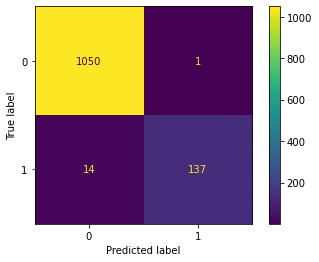

In [92]:
svc_rbk_iht = SVC(kernel = "rbf", C = 10, max_iter = 1e+06)
svc_rbk_iht.fit(iht_x_train, iht_y_train)

iht_svc_rbk_prediction = svc_rbk_iht.predict(iht_x_test)
PrintClassificationMetrics(iht_y_test, iht_svc_rbk_prediction)

plot_confusion_matrix(svc_rbk_iht, iht_x_test, iht_y_test)

Потрясающе!!!

In [93]:
from imblearn.under_sampling import CondensedNearestNeighbour


cnn = CondensedNearestNeighbour(random_state = RANDOM_STATE, n_jobs = 8)
cnn_x, cnn_y = cnn.fit_resample(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]].astype("int32"))
print(cnn_y.value_counts())

cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x, cnn_y, random_state = RANDOM_STATE, train_size = 0.85)

1    1153
0     913
Name: target_class, dtype: int64


-Погрешность (accuracy, balanced) = 0.8898780642166997;          
-Меткость (precision, класс 1) = 0.9477124183006536;          
-Полнота (recall, класс 1) = 0.838150289017341;          
-F1 (класс 1) = 0.8895705521472391;          
-ROC AUC = 0.8898780642166996.


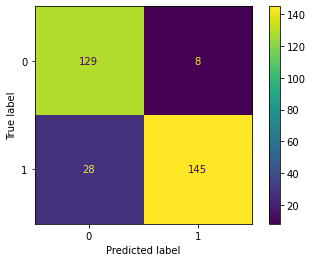

In [94]:
svc_rbk_cnn = SVC(kernel = "rbf", C = 10, max_iter = 1e+06)
svc_rbk_cnn.fit(cnn_x_train, cnn_y_train)

cnn_svc_rbk_prediction = svc_rbk_cnn.predict(cnn_x_test)
PrintClassificationMetrics(cnn_y_test, cnn_svc_rbk_prediction)

plot_confusion_matrix(svc_rbk_cnn, cnn_x_test, cnn_y_test)

In [95]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours


renn = RepeatedEditedNearestNeighbours(n_jobs = 8)
renn_x, renn_y = renn.fit_resample(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]].astype("int32"))
print(renn_y.value_counts())

renn_x_train, renn_x_test, renn_y_train, renn_y_test = train_test_split(renn_x, renn_y, random_state = RANDOM_STATE, train_size = 0.85)

0    10818
1     1153
Name: target_class, dtype: int64


-Погрешность (accuracy, balanced) = 0.9168717291747283;          
-Меткость (precision, класс 1) = 0.9927007299270073;          
-Полнота (recall, класс 1) = 0.8343558282208589;          
-F1 (класс 1) = 0.9066666666666666;          
-ROC AUC = 0.9168717291747283.


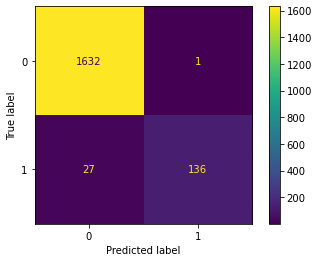

In [96]:
svc_rbk_renn = SVC(kernel = "rbf", C = 10, max_iter = 1e+06)
svc_rbk_renn.fit(renn_x_train, renn_y_train)

renn_svc_rbk_prediction = svc_rbk_renn.predict(renn_x_test)
PrintClassificationMetrics(renn_y_test, renn_svc_rbk_prediction)

plot_confusion_matrix(svc_rbk_renn, renn_x_test, renn_y_test)

### OVERSAMPLING!

In [24]:
from imblearn.over_sampling import ADASYN

In [26]:
adasyn = ADASYN(random_state = RANDOM_STATE, n_jobs = 8)
adasyn_x, adasyn_y = adasyn.fit_resample(lab4_classification_data[columns[:-1]], lab4_classification_data[columns[-1]].astype("int32"))
print(adasyn_y.value_counts())

adasyn_x_train, adasyn_x_test, adasyn_y_train, adasyn_y_test = train_test_split(adasyn_x, adasyn_y, random_state = RANDOM_STATE, train_size = 0.85)

1    11377
0    11375
Name: target_class, dtype: int64


In [27]:
temp = adasyn_x.join(adasyn_y)
temp.to_csv("ML_Datasets/Prepared/pulsar_oversampg_adasyn.csv")

In [ ]:
svc_rbk_adasyn = SVC(kernel = "rbf", C = 10, max_iter = 1e+06)
svc_rbk_adasyn.fit(adasyn_x_train, adasyn_y_train)

adasyn_svc_rbk_prediction = svc_rbk_adasyn.predict(adasyn_x_test)
PrintClassificationMetrics(adasyn_y_test, adasyn_svc_rbk_prediction)

plot_confusion_matrix(svc_rbk_adasyn, adasyn_x_test, adasyn_y_test)

-Погрешность (accuracy, balanced) = 0.8997897423958034;          
-Меткость (precision, класс 1) = 0.8862478777589134;          
-Полнота (recall, класс 1) = 0.9173989455184535;          
-F1 (класс 1) = 0.9015544041450778;          
-ROC AUC = 0.8997897423958034.


## Часть 2. Регрессия
Для изучения регрессии воспользуемся набором данных, который был детально изучен во второй и третьей лабораторных работах. Попробуем обучить все требуемые модели на двух наборах данных: с использованием масштабирования признаков и без оного.
### 1. Структура набора данных
Вспомним, что представляет из себя датасет:

In [8]:
# Функция вернёт обновлённый список колонок
def MoveColumnToEnd(data, column_name):
    columns = data.columns.tolist()
    column = columns.pop(columns.index(column_name))
    columns.append(column)
    return columns


lab4_regression_data_unscaled = pd.read_csv("ML_Datasets/Lab2/lab2_unscaled.csv")
lab4_regression_data_scaled = pd.read_csv("ML_Datasets/Lab2/lab2_scaled.csv")

# Переместим целевой признак в конец
columns = MoveColumnToEnd(lab4_regression_data_unscaled, "Price")[1:]

lab4_regression_data_unscaled = lab4_regression_data_unscaled[columns]
lab4_regression_data_scaled = lab4_regression_data_scaled[columns]

lab4_regression_data_unscaled.to_csv("ML_Datasets/Prepared/cars_filled.csv")
lab4_regression_data_scaled.to_csv("ML_Datasets/Prepared/cars_filled_n_scaled.csv")

In [98]:
lab4_regression_data_unscaled.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Price
0,2010,72000,1,26.60,998.0,58.16,5.0,0,0,0,...,0,1,0,1,0,0,0,0,1,1.75
1,2015,41000,1,19.67,1582.0,126.20,5.0,0,0,0,...,0,0,1,0,1,0,0,0,1,12.50
2,2011,46000,1,18.20,1199.0,88.70,5.0,0,0,1,...,0,0,0,0,0,0,1,0,1,4.50
3,2012,87000,1,20.77,1248.0,88.76,7.0,0,0,1,...,0,0,0,0,1,0,0,0,1,6.00
4,2013,40670,2,15.20,1968.0,140.80,5.0,0,0,0,...,0,0,0,0,1,0,0,1,0,17.74


In [99]:
lab4_regression_data_scaled.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Price
0,0.571429,0.145248,1,0.793083,-1.039023,-1.027489,0.5,0,0,0,...,0,1,0,1,0,0,0,0,1,-0.690729
1,0.809524,-0.194380,1,0.586464,-0.064632,0.249596,0.5,0,0,0,...,0,0,1,0,1,0,0,0,1,0.270064
2,0.619048,-0.139601,1,0.542636,-0.703659,-0.454264,0.5,0,0,1,...,0,0,0,0,0,0,1,0,1,-0.444945
3,0.666667,0.309585,1,0.619261,-0.621904,-0.453138,0.7,0,0,1,...,0,0,0,0,1,0,0,0,1,-0.310880
4,0.714286,-0.197996,2,0.453190,0.579401,0.523633,0.5,0,0,0,...,0,0,0,0,1,0,0,1,0,0.738395


In [100]:
lab4_regression_data_unscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   int64  
 1   Kilometers_Driven       6017 non-null   int64  
 2   Owner_Type              6017 non-null   int64  
 3   Mileage                 6017 non-null   float64
 4   Engine                  6017 non-null   float64
 5   Power                   6017 non-null   float64
 6   Seats                   6017 non-null   float64
 7   Location_Ahmedabad      6017 non-null   int64  
 8   Location_Bangalore      6017 non-null   int64  
 9   Location_Chennai        6017 non-null   int64  
 10  Location_Coimbatore     6017 non-null   int64  
 11  Location_Delhi          6017 non-null   int64  
 12  Location_Hyderabad      6017 non-null   int64  
 13  Location_Jaipur         6017 non-null   int64  
 14  Location_Kochi          6017 non-null   

In [101]:
lab4_regression_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   float64
 1   Kilometers_Driven       6017 non-null   float64
 2   Owner_Type              6017 non-null   int64  
 3   Mileage                 6017 non-null   float64
 4   Engine                  6017 non-null   float64
 5   Power                   6017 non-null   float64
 6   Seats                   6017 non-null   float64
 7   Location_Ahmedabad      6017 non-null   int64  
 8   Location_Bangalore      6017 non-null   int64  
 9   Location_Chennai        6017 non-null   int64  
 10  Location_Coimbatore     6017 non-null   int64  
 11  Location_Delhi          6017 non-null   int64  
 12  Location_Hyderabad      6017 non-null   int64  
 13  Location_Jaipur         6017 non-null   int64  
 14  Location_Kochi          6017 non-null   

<AxesSubplot:>

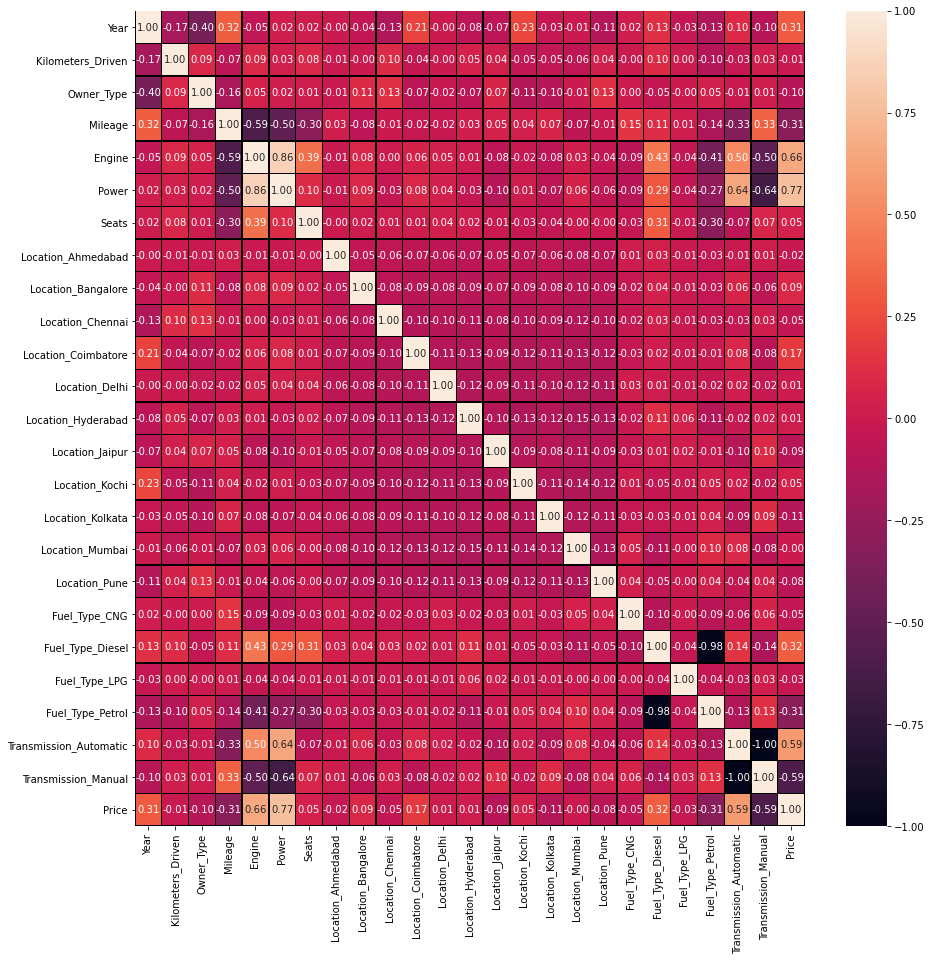

In [102]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(lab4_regression_data_scaled.corr(), ax=ax, annot=True, fmt=".2f", linewidths=0.3, linecolor="black", vmin = -1, vmax = 1)

In [103]:
lab4_regr_x_train_unscaled, lab4_regr_x_test_unscaled, lab4_regr_y_train_unscaled, lab4_regr_y_test_unscaled = train_test_split(lab4_regression_data_unscaled[columns[:-1]], 
                                                                                                                                 lab4_regression_data_unscaled[columns[-1]],
                                                                                                                                 train_size = 0.85,
                                                                                                                                 random_state = RANDOM_STATE)
lab4_regr_x_train_scaled, lab4_regr_x_test_scaled, lab4_regr_y_train_scaled, lab4_regr_y_test_scaled = train_test_split(lab4_regression_data_scaled[columns[:-1]], 
                                                                                                                         lab4_regression_data_scaled[columns[-1]],
                                                                                                                         train_size = 0.85,
                                                                                                                         random_state = RANDOM_STATE)

### 2. Обучение линейной модели
Обучим регрессоры на основе метода наименьших квадратов и градиентного спуска

In [104]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

def PrintRegressionMetrics(y_test, y_predicted):
    print("-Средняя абсолютная ошибка = {0};\
          \n-Медианная абсолютная ошибка = {1};\
          \n-Среднеквадратичная ошибка = {2};\
          \n-Коэффициент детерминации = {3}.".format(mean_absolute_error(y_test, y_predicted),
                                                        median_absolute_error(y_test, y_predicted),
                                                        mean_squared_error(y_test, y_predicted, squared = False),
                                                        r2_score(y_test, y_predicted)))


def FitPredictRegr(model, x_train, x_test, y_train, y_test):
    solver = model
    solver.fit(x_train, y_train)
    prediction = solver.predict(x_test)
    PrintRegressionMetrics(y_test, prediction)

In [105]:
print("Метод наименьших квадратов для немасштабированных данных:")
FitPredictRegr(LinearRegression(n_jobs = 4), 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

print("Метод наименьших квадратов для масштабированных данных:")
FitPredictRegr(LinearRegression(n_jobs = 4), 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

Метод наименьших квадратов для немасштабированных данных:
-Средняя абсолютная ошибка = 3.843889525116347;          
-Медианная абсолютная ошибка = 2.481593427335838;          
-Среднеквадратичная ошибка = 9.48852393311607;          
-Коэффициент детерминации = 0.1504727257500874.
Метод наименьших квадратов для масштабированных данных:
-Средняя абсолютная ошибка = 0.34355180128156587;          
-Медианная абсолютная ошибка = 0.22179510790800733;          
-Среднеквадратичная ошибка = 0.8480471323188392;          
-Коэффициент детерминации = 0.1504727257500762.


In [106]:
print("Градиентный спуск для немасштабированных данных:")
FitPredictRegr(SGDRegressor(), 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

print("Градиентный спуск для масштабированных данных:")
FitPredictRegr(SGDRegressor(), 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

Градиентный спуск для немасштабированных данных:
-Средняя абсолютная ошибка = 9.315912044825573e+17;          
-Медианная абсолютная ошибка = 7.46686124138221e+17;          
-Среднеквадратичная ошибка = 3.1639019371256596e+18;          
-Коэффициент детерминации = -9.445523668145506e+34.
Градиентный спуск для масштабированных данных:
-Средняя абсолютная ошибка = 0.36284449749969566;          
-Медианная абсолютная ошибка = 0.20836710746963072;          
-Среднеквадратичная ошибка = 1.1119514865364233;          
-Коэффициент детерминации = -0.46052510426885074.


Возможно, такой ужасный результат связан с нехваткой объёма датасета.

In [107]:
from sklearn.model_selection import ShuffleSplit


l1_ratio_range = np.array(np.arange(0.0, 1.1, 0.1))
learning_rate_range = np.array(np.geomspace(1e-06, 1, num = 7))

cv_scoring_strategies = {"RMSE (negative)" : "neg_root_mean_squared_error",
                         "MedianAE" : "neg_median_absolute_error",
                         "R2-score" : "r2"}

sgdr_grid = GridSearchCV(estimator = SGDRegressor(penalty = "elasticnet", learning_rate = "constant"),
                         param_grid = [{"l1_ratio" : l1_ratio_range,
                                        "eta0" : learning_rate_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = "R2-score")

sgdr_grid.fit(lab4_regression_data_unscaled[columns[:-1]], lab4_regression_data_unscaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SGDRegressor(learning_rate='constant',
                                    penalty='elasticnet'),
             n_jobs=8,
             param_grid=[{'eta0': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
             refit='R2-score',
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

In [108]:
print("Градиентный спуск для немасштабированных данных:")
FitPredictRegr(sgdr_grid.best_estimator_, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

Градиентный спуск для немасштабированных данных:
-Средняя абсолютная ошибка = 91110681555762.4;          
-Медианная абсолютная ошибка = 86120735195199.02;          
-Среднеквадратичная ошибка = 119408650837020.38;          
-Коэффициент детерминации = -1.3454005306145436e+26.


In [109]:
sgdr_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SGDRegressor(learning_rate='constant',
                                    penalty='elasticnet'),
             n_jobs=8,
             param_grid=[{'eta0': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
             refit='R2-score',
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

In [110]:
sgdr_grid.best_estimator_

SGDRegressor(l1_ratio=0.6000000000000001, learning_rate='constant',
             penalty='elasticnet')

In [111]:
print("Градиентный спуск для масштабированных данных:")
FitPredictRegr(sgdr_grid.best_estimator_, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

Градиентный спуск для масштабированных данных:
-Средняя абсолютная ошибка = 0.4577669292633768;          
-Медианная абсолютная ошибка = 0.3082891600830855;          
-Среднеквадратичная ошибка = 0.7641734490605413;          
-Коэффициент детерминации = 0.31020310503093307.


Регуляризованная модель слегка помогла, однако для немасштабированных данных результаты всё ещё катастрофические.

### 3. Обучение машины опорных векторов

In [112]:
from sklearn.svm import SVR, NuSVR, LinearSVR

#### LinearSVR

(*эксперименты, проведённые с параметром max_iter, остались за кадром, но было установлено, что стандартное значение в 1000 даёт лучшие результаты, нежели 10000, и худшие, чем 100000*)

In [113]:
lsvr_range = np.array(np.geomspace(1e-08, 1e+01, num = 10))

lsvr_grid = GridSearchCV(estimator = LinearSVR(max_iter = 1e+04, random_state = RANDOM_STATE),
                         param_grid = [{"C" : lsvr_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)

lsvr_grid.fit(lab4_regression_data_unscaled[columns[:-1]], lab4_regression_data_unscaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=LinearSVR(max_iter=10000.0, random_state=8), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

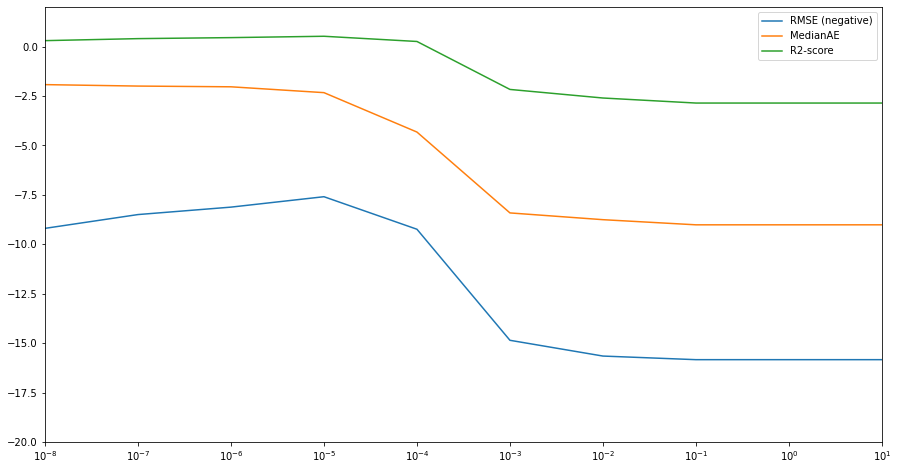

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(lsvr_range, lsvr_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1)
plt.ylim(-20, 2)
plt.xticks(lsvr_range)
plt.legend(loc="best")

plt.show()

Остановимся на **C = 10^-5**

In [115]:
lsvr = LinearSVR(C = 1e-05, max_iter = 1e+06, random_state = RANDOM_STATE)
FitPredictRegr(lsvr, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

-Средняя абсолютная ошибка = 3.9191969596671465;          
-Медианная абсолютная ошибка = 1.8976011633029377;          
-Среднеквадратичная ошибка = 12.051171677527929;          
-Коэффициент детерминации = -0.37037225909443783.


Теперь посмотрим на масштабированные данные:

In [116]:
lsvr_range = np.array(np.geomspace(1e-08, 1e+04, num = 13))

lsvr_grid = GridSearchCV(estimator = LinearSVR(max_iter = 1e+04, random_state = RANDOM_STATE),
                         param_grid = [{"C" : lsvr_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)

lsvr_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=LinearSVR(max_iter=10000.0, random_state=8), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

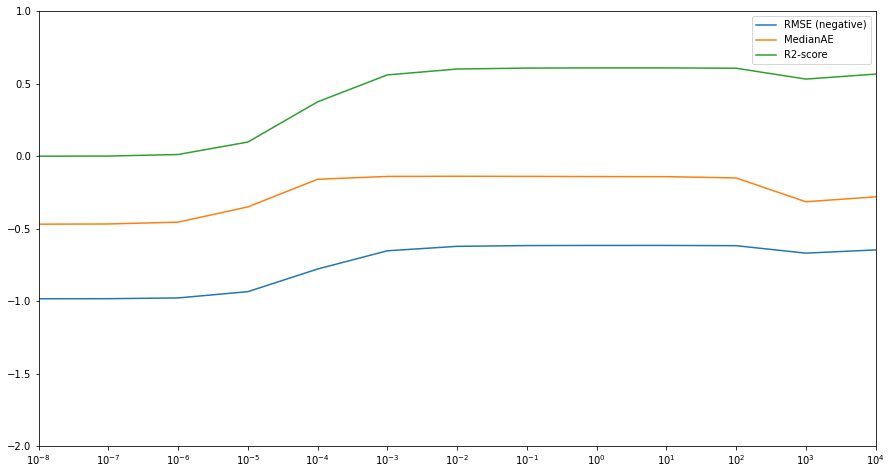

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(lsvr_range, lsvr_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1e+04)
plt.ylim(-2, 1)
plt.xticks(lsvr_range)
plt.legend(loc="best")

plt.show()

In [118]:
lsvr = LinearSVR(C = 10, max_iter = 1e+06, random_state = RANDOM_STATE)
FitPredictRegr(lsvr, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.28484414950738735;          
-Медианная абсолютная ошибка = 0.13522587898416769;          
-Среднеквадратичная ошибка = 0.7164738690612883;          
-Коэффициент детерминации = 0.39362950938820374.


#### SVR
##### Линейное ядро

In [119]:
svr_range = np.array(np.geomspace(1e-08, 1e-01, num = 8))


svr_lk_grid = GridSearchCV(estimator = SVR(kernel = "linear", max_iter = 1e+06),
                         param_grid = [{"C" : svr_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)

svr_lk_grid.fit(lab4_regression_data_unscaled[columns[:-1]], lab4_regression_data_unscaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SVR(kernel='linear', max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

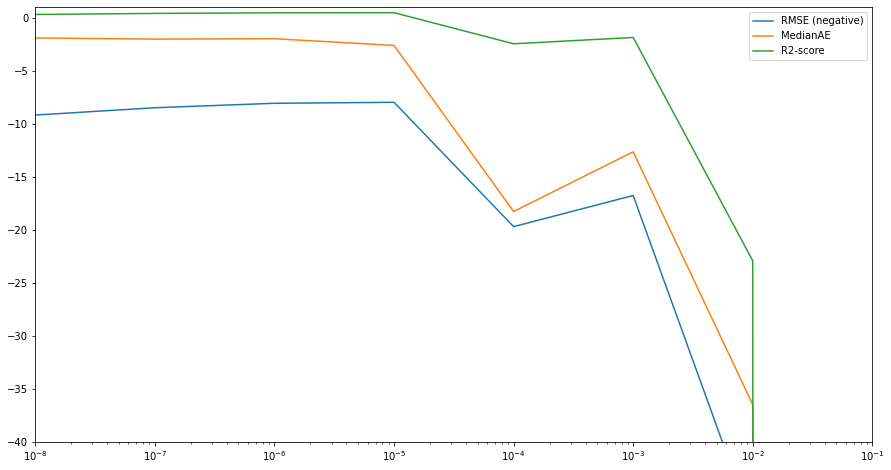

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svr_range, svr_lk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1e-01)
plt.ylim(-40, 1)
plt.xticks(svr_range)
plt.legend(loc="best")

plt.show()

In [121]:
svr_lk = SVR(kernel = "linear", C = 1e-06,  max_iter = 1e+07)
FitPredictRegr(svr_lk, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

-Средняя абсолютная ошибка = 4.13465560739627;          
-Медианная абсолютная ошибка = 1.9114360948917382;          
-Среднеквадратичная ошибка = 13.77695779167795;          
-Коэффициент детерминации = -0.7909632219329568.


In [122]:
svr_range = np.array(np.geomspace(1e-08, 1e+01, num = 10))

svr_lk_grid = GridSearchCV(estimator = SVR(kernel = "linear", max_iter = 1e+06),
                         param_grid = [{"C" : svr_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         n_jobs = 8,
                         refit = False)

svr_lk_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SVR(kernel='linear', max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

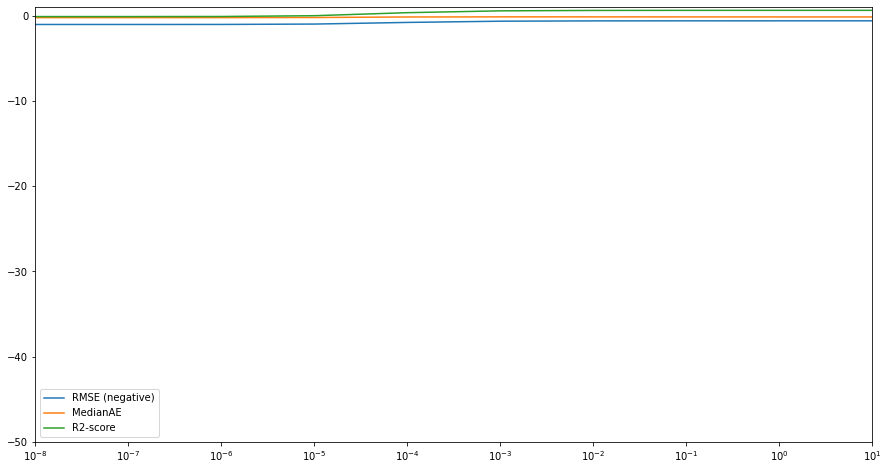

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svr_range, svr_lk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1e-02)
plt.ylim(-50, 1)
plt.xticks(svr_range)
plt.legend(loc="best")

plt.show()

In [124]:
svr_lk = SVR(kernel = "linear", C = 10,  max_iter = 1e+06)
FitPredictRegr(svr_lk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.2880775334979033;          
-Медианная абсолютная ошибка = 0.14622628574646407;          
-Среднеквадратичная ошибка = 0.7142612677782265;          
-Коэффициент детерминации = 0.39736889066819625.


*max_iter = 1e+05 даёт плохие результаты!*

##### Полиномиальное ядро

In [125]:
svr_pk_c_range = np.array(np.geomspace(1e-08, 1e+02, num = 11))
svr_pk_degree_range = np.array([2, 3, 4, 5])

svr_pk_grid = GridSearchCV(estimator = SVR(kernel = "poly", max_iter = 1e+06),
                         param_grid = [{"C" : svr_pk_c_range, "degree" : svr_pk_degree_range}],
                         n_jobs = 8,
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = "RMSE (negative)")

svr_pk_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])


GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SVR(kernel='poly', max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02]),
                          'degree': array([2, 3, 4, 5])}],
             refit='RMSE (negative)',
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

In [126]:
svr_pk_grid.best_params_

{'C': 10.0, 'degree': 3}

In [127]:
svr_pk = SVR(degree=2, kernel='poly', C = 0.001, max_iter=1e+06)
FitPredictRegr(svr_pk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.3067736458704797;          
-Медианная абсолютная ошибка = 0.14310084881385027;          
-Среднеквадратичная ошибка = 0.6245179179456987;          
-Коэффициент детерминации = 0.5392905155127015.


In [128]:
FitPredictRegr(svr_pk, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

-Средняя абсолютная ошибка = 7.2663067824086305;          
-Медианная абсолютная ошибка = 2.539285736327124;          
-Среднеквадратичная ошибка = 54.057866766736375;          
-Коэффициент детерминации = -26.57387604464264.


##### Радиально-базисное ядро

In [129]:
svr_rbk_c_range = np.array(np.geomspace(1e-08, 1e+05, num = 14))

svr_rbk_grid = GridSearchCV(estimator = SVR(kernel = "rbf", max_iter = 1e+06),
                         param_grid = [{"C" : svr_rbk_c_range}],
                         n_jobs = 8,
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = False)

svr_rbk_grid.fit(lab4_regression_data_unscaled[columns[:-1]], lab4_regression_data_unscaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SVR(max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

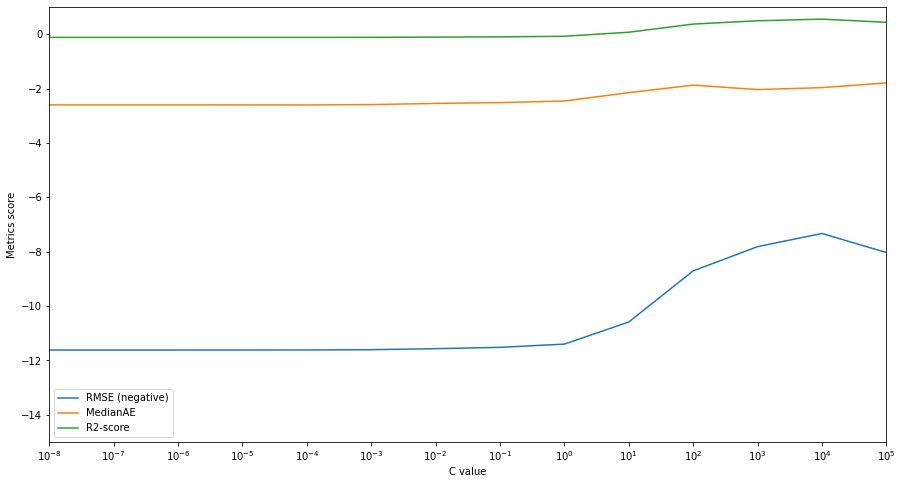

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svr_rbk_c_range, svr_rbk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1e+05)
plt.ylim(-15, 1)
plt.xticks(svr_rbk_c_range)
plt.legend(loc="best")
plt.xlabel("C value")
plt.ylabel("Metrics score")

plt.show()

In [131]:
svr_rbk = SVR(kernel='rbf', C = 1e+04, max_iter=1e+07)

FitPredictRegr(svr_rbk, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

-Средняя абсолютная ошибка = 3.514139944779702;          
-Медианная абсолютная ошибка = 1.7948532967197313;          
-Среднеквадратичная ошибка = 6.981301008970728;          
-Коэффициент детерминации = 0.5401112994358535.


In [132]:
svr_rbk_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=SVR(max_iter=1000000.0), n_jobs=8,
             param_grid=[{'C': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

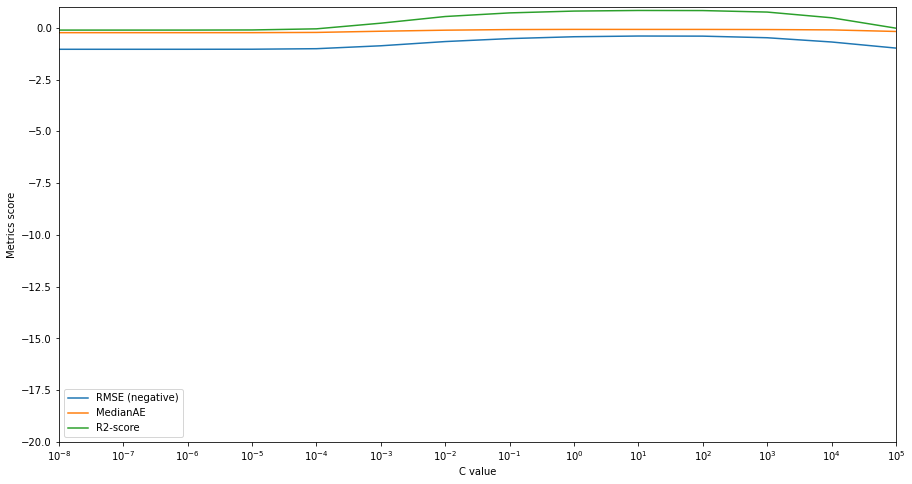

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(svr_rbk_c_range, svr_rbk_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

ax.set_xscale("log")
plt.xlim(1e-08, 1e+05)
plt.ylim(-20, 1)
plt.xticks(svr_rbk_c_range)
plt.legend(loc="best")
plt.xlabel("C value")
plt.ylabel("Metrics score")

plt.show()

In [134]:
svr_rbk = SVR(kernel='rbf', C = 10, max_iter=1e+06)

FitPredictRegr(svr_rbk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.15625838350510854;          
-Медианная абсолютная ошибка = 0.07382781017596385;          
-Среднеквадратичная ошибка = 0.33982969200374424;          
-Коэффициент детерминации = 0.8635856712063779.


Отличный результат!

**В кросс-валидацию подставлять весь датасет, без разделения на выборки (исправить везде)**

### 4. Обучение дерева решений

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
max_depth_range = np.array(range(2, 20))

tree_regr_grid = GridSearchCV(estimator = DecisionTreeRegressor(random_state = RANDOM_STATE),
                         param_grid = [{"max_depth" : max_depth_range}],
                         cv = ShuffleSplit(n_splits = 6, random_state = RANDOM_STATE),
                         scoring = cv_scoring_strategies,
                         refit = False)

tree_regr_grid.fit(lab4_regression_data_unscaled[columns[:-1]], lab4_regression_data_unscaled[columns[-1]])

GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=8, test_size=None, train_size=None),
             estimator=DecisionTreeRegressor(random_state=8),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])}],
             refit=False,
             scoring={'MedianAE': 'neg_median_absolute_error', 'R2-score': 'r2',
                      'RMSE (negative)': 'neg_root_mean_squared_error'})

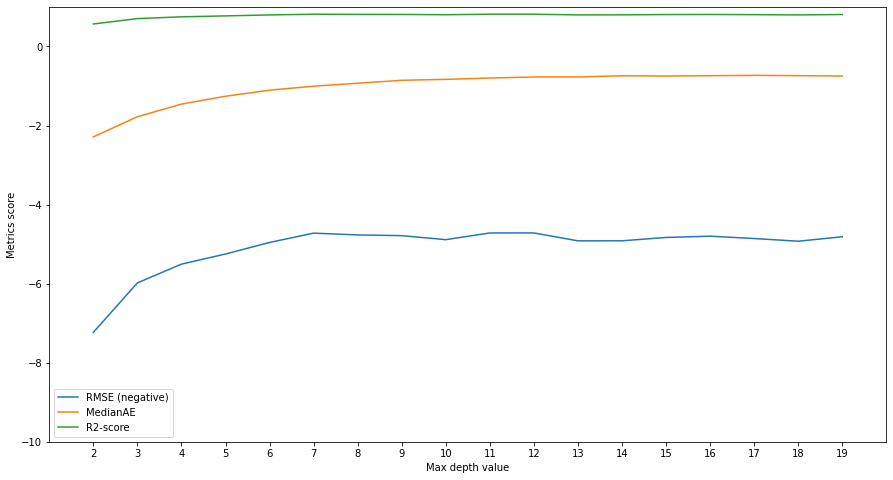

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(max_depth_range, tree_regr_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

plt.xlim(max_depth_range[0] - 1, max_depth_range[-1] + 1)
plt.ylim(-10, 1)
plt.xticks(max_depth_range)
plt.legend(loc="best")
plt.xlabel("Max depth value")
plt.ylabel("Metrics score")

plt.show()

In [138]:
tree_regr = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 12)

FitPredictRegr(tree_regr, 
                 lab4_regr_x_train_unscaled, 
                 lab4_regr_x_test_unscaled, 
                 lab4_regr_y_train_unscaled, 
                 lab4_regr_y_test_unscaled)

-Средняя абсолютная ошибка = 1.9252257187428357;          
-Медианная абсолютная ошибка = 0.7549999999999994;          
-Среднеквадратичная ошибка = 4.163278868943775;          
-Коэффициент детерминации = 0.8364498238392606.


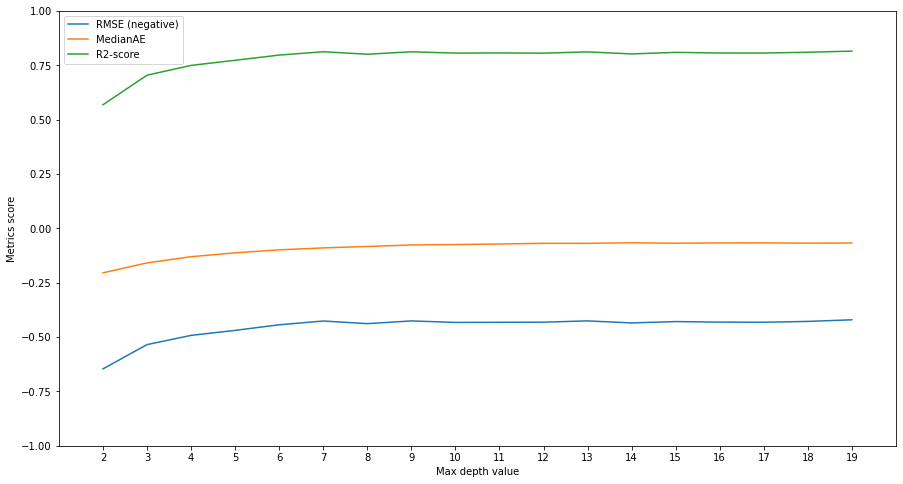

In [139]:
tree_regr_grid.fit(lab4_regression_data_scaled[columns[:-1]], lab4_regression_data_scaled[columns[-1]])

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

for strategy in cv_scoring_strategies:
    ax.plot(max_depth_range, tree_regr_grid.cv_results_["mean_test_{}".format(strategy)], label = strategy)

plt.xlim(max_depth_range[0] - 1, max_depth_range[-1] + 1)
plt.ylim(-1, 1)
plt.xticks(max_depth_range)
plt.legend(loc="best")
plt.xlabel("Max depth value")
plt.ylabel("Metrics score")

plt.show()

In [140]:
tree_regr = DecisionTreeRegressor(random_state = RANDOM_STATE, max_depth = 12)

FitPredictRegr(tree_regr, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.1680748586047072;          
-Медианная абсолютная ошибка = 0.06747894503022561;          
-Среднеквадратичная ошибка = 0.3634344524614895;          
-Коэффициент детерминации = 0.8439766724052707.


Видим, что дерево решений не так сильно пострадало от отсутствия масштабирования данных, как остальные модели. Тем не менее, ошибка все равно снизилась существенно.

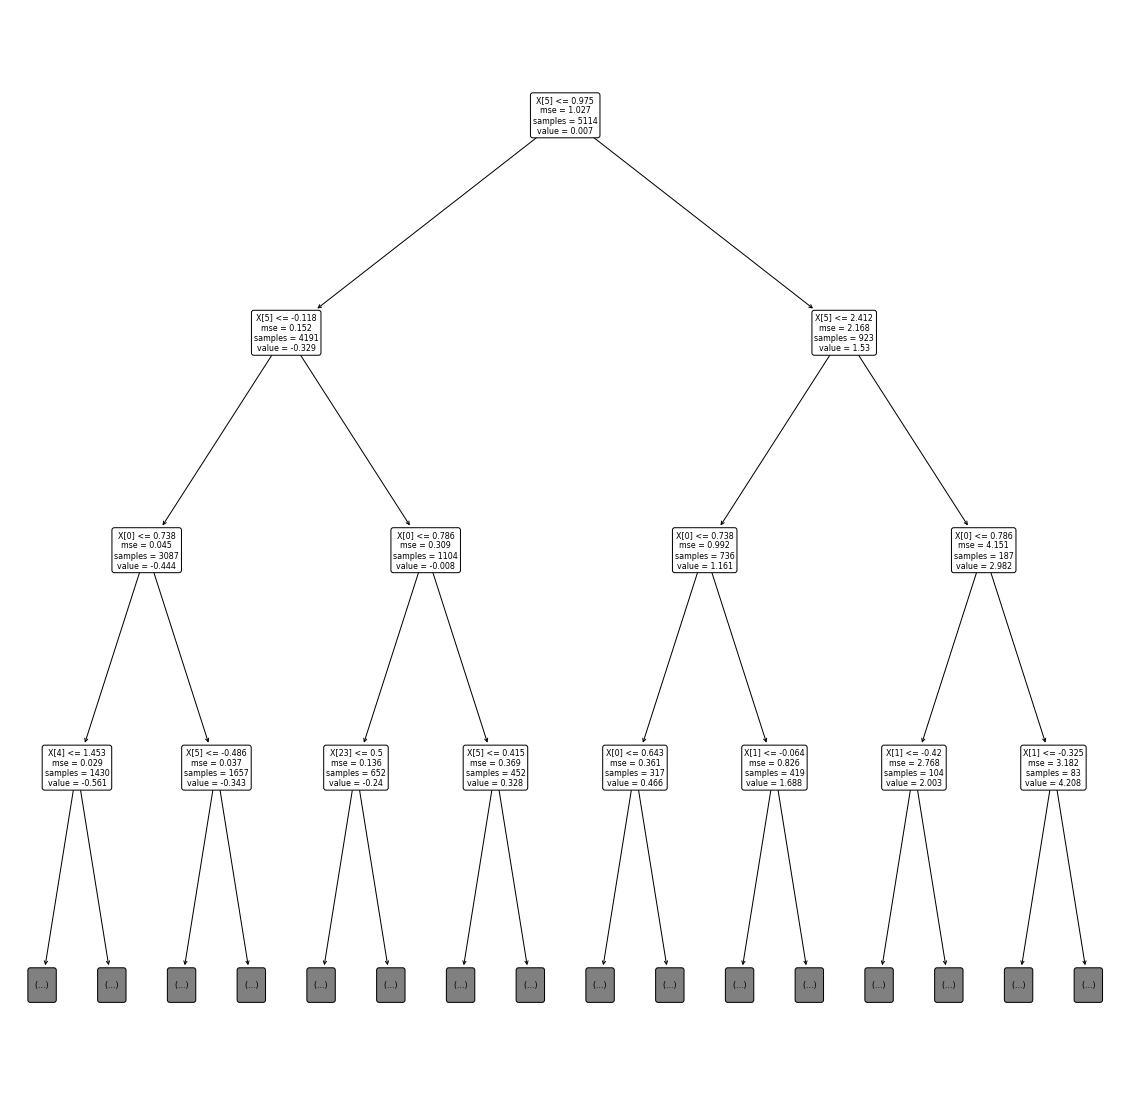

In [141]:
fig = plt.figure(figsize = (20, 20))
tree.plot_tree(tree_regr, max_depth = 3, rounded = True)
plt.savefig("tree_regr.png", dpi = fig.dpi * 10)
plt.show()

### Итоги
Масштабирование данных критическим образом влияет на регрессионную модель (за исключением, возможно, дерева). На масштабированных данных все модели показали достойный результат.
##### Линейная модель

In [142]:
FitPredictRegr(sgdr_grid.best_estimator_, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.31016989148627616;          
-Медианная абсолютная ошибка = 0.19045791008753155;          
-Среднеквадратичная ошибка = 0.6139274408961798;          
-Коэффициент детерминации = 0.5547833085756537.


##### LinearSVR

In [143]:
FitPredictRegr(lsvr, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.28484414950738735;          
-Медианная абсолютная ошибка = 0.13522587898416769;          
-Среднеквадратичная ошибка = 0.7164738690612883;          
-Коэффициент детерминации = 0.39362950938820374.


##### SVR с линейным ядром

In [144]:
FitPredictRegr(svr_lk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.2880775334979033;          
-Медианная абсолютная ошибка = 0.14622628574646407;          
-Среднеквадратичная ошибка = 0.7142612677782265;          
-Коэффициент детерминации = 0.39736889066819625.


##### SVR с полиномиальным ядром

In [145]:
FitPredictRegr(svr_pk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.3067736458704797;          
-Медианная абсолютная ошибка = 0.14310084881385027;          
-Среднеквадратичная ошибка = 0.6245179179456987;          
-Коэффициент детерминации = 0.5392905155127015.


##### SVR с радиально-базисным ядром

In [146]:
FitPredictRegr(svr_rbk, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.15625838350510854;          
-Медианная абсолютная ошибка = 0.07382781017596385;          
-Среднеквадратичная ошибка = 0.33982969200374424;          
-Коэффициент детерминации = 0.8635856712063779.


##### Дерево решений

In [147]:
FitPredictRegr(tree_regr, 
                 lab4_regr_x_train_scaled, 
                 lab4_regr_x_test_scaled, 
                 lab4_regr_y_train_scaled, 
                 lab4_regr_y_test_scaled)

-Средняя абсолютная ошибка = 0.1680748586047072;          
-Медианная абсолютная ошибка = 0.06747894503022561;          
-Среднеквадратичная ошибка = 0.3634344524614895;          
-Коэффициент детерминации = 0.8439766724052707.
